In [2]:
from matplotlib import colors, cm
import matplotlib.pyplot as plt


import numpy as np
import math
import time
import utpy.utils
import utpy.vis
import flatpy
import vtk
from vtk.util import numpy_support
from vtkmodules.vtkCommonDataModel import vtkStructuredPoints

In [2]:
#sample histogram with two bins
def sampleHistogram(a1,b1,c1,numSamples,threshold):

    # True computation using plain Monte Carlo    
    sampleHistogram = np.zeros((1,numSamples))        
    for k in range(numSamples):
        s = np.random.uniform(0,1,1)
        if (s < threshold):
            sampleHistogram[0,k] = np.random.uniform(a1,b1,1)
        else:
            sampleHistogram[0,k] = np.random.uniform(b1,c1,1)
        
    return sampleHistogram

In [40]:
# MC sampling
# make sure a<b for each interval below

#X1 (one bin with width w=2)
a1 = 1
b1 = 2
c1 = 3

#X2 (two bins each with width k=1)
a2 = 2
b2 = 3
c2 = 4

#X3
a3 = 4
b3 = 5
c3 = 6

#X4 
a4 = 4
b4 = 5

#X5
a5 = 4
b5 = 5

threshold = 0.4

# histogram representation
numBins1 = 2
numBins2 = 2
numBins3 = 2
numBins4 = 1
numBins5 = 1

hist1 = np.zeros((numBins1,))
bins1 = np.zeros((numBins1+1,))
hist1[0] = threshold
hist1[1] = 1-threshold
bins1[0] = a1
bins1[1] = b1
bins1[2] = c1
print(hist1)
print(bins1)


hist2 = np.zeros((numBins2,))
bins2 = np.zeros((numBins2+1,))
hist2[0] = threshold
hist2[1] = 1-threshold
bins2[0] = a2
bins2[1] = b2
bins2[2] = c2

hist3 = np.zeros((numBins3,))
bins3 = np.zeros((numBins3+1,))
hist3[0] = threshold
hist3[1] = 1-threshold
bins3[0] = a3
bins3[1] = b3
bins3[2] = c3

hist4 = np.zeros((numBins4,))
bins4 = np.zeros((numBins4+1,))
hist4[0] = 1
bins4[0] = a4
bins4[1] = b4

hist5 = np.zeros((numBins5,))
bins5 = np.zeros((numBins5+1,))
hist5[0] = 1
bins5[0] = a5
bins5[1] = b5

numSamples = 800000
numMinima = 0

subpart1 = 0
subpart2 = 0

x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = sampleHistogram(a2,b2,c2,numSamples,threshold)
x3Samples = sampleHistogram(a3,b3,c3,numSamples,threshold)
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))
    
for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        numMinima = numMinima + 1
        
print('x1 minimum probability (truth)', numMinima/numSamples)  


[0.4 0.6]
[1. 2. 3.]
x1 minimum probability (truth) 1.0


In [41]:
# Computation in parts (Monte Carlo)

subpart1=0
subpart2=0
subpart3=0
subpart4=0

# Part 1
x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = np.random.uniform(low=a2, high=b2, size=(1,numSamples))
x3Samples = np.random.uniform(low=a3, high=b3, size=(1,numSamples))
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        subpart1 = subpart1 + 1
subpart1Prob = subpart1/numSamples      
factor1= threshold*threshold

# Part 2
x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = np.random.uniform(low=b2, high=c2, size=(1,numSamples))
x3Samples = np.random.uniform(low=a3, high=b3, size=(1,numSamples))
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        subpart2 = subpart2 + 1
subpart2Prob = subpart2/numSamples
factor2= (1-threshold)*threshold

# Part 3
x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = np.random.uniform(low=a2, high=b2, size=(1,numSamples))
x3Samples = np.random.uniform(low=b3, high=c3, size=(1,numSamples))
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        subpart3 = subpart3 + 1
subpart3Prob = subpart3/numSamples      
factor3= threshold*(1-threshold)

# Part 4
x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = np.random.uniform(low=b2, high=c2, size=(1,numSamples))
x3Samples = np.random.uniform(low=b3, high=c3, size=(1,numSamples))
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        subpart4 = subpart4 + 1
subpart4Prob = subpart4/numSamples
factor4= (1-threshold)*(1-threshold)


print("probability using parts", factor1*subpart1Prob + factor2*subpart2Prob + factor3*subpart3Prob + factor4*subpart4Prob)


probability using parts 1.0


In [42]:
# Computation in parts (Closed form)

subpart1=0
subpart2=0
subpart3=0
subpart4=0

# Part 1
subpart1Prob = superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5)
factor1= threshold*threshold

# Part 2
subpart2Prob = superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,b2,c2,a3,b3,a4,b4,a5,b5)
factor2= (1-threshold)*threshold

# Part 3
subpart3Prob = superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,b3,c3,a4,b4,a5,b5)
factor3= threshold*(1-threshold)

# Part 4
subpart4Prob = superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,b2,c2,b3,c3,a4,b4,a5,b5)
factor4= (1-threshold)*(1-threshold)


print("probability using parts", factor1*subpart1Prob + factor2*subpart2Prob + factor3*subpart3Prob + factor4*subpart4Prob)


probability using parts 1.0


In [43]:
def probSingleHist(value, histBinIndexIth, bins, hist, cdf):

    if histBinIndexIth == 0:
        p = 1
    elif histBinIndexIth== len(bins):
        p = 0
    else:
        if (histBinIndexIth == len(hist)):
            p = (bins[histBinIndexIth] - value)/(bins[histBinIndexIth] - bins[histBinIndexIth-1])*hist[histBinIndexIth-1]
        else:
            p = (bins[histBinIndexIth] - value)/(bins[histBinIndexIth] - bins[histBinIndexIth-1])*hist[histBinIndexIth-1] + cdf[histBinIndexIth]

    return p

In [44]:
# Minmum Probability computation for a single pixel using histogram approach (Monte Carlo)
# If there are n bins each at point of interest and 4 local neighbors, computational time complexity
# is  n^5*(numberofMonteCarlo samples)

# Pass histogram and bin_edges information computed using numpy histogram at the point of interest and each of local neighbors
def histogramSemiAnalytical2(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5, numSamples):

    minimumProb = 0
    numBins1 = len(hist1)
    numBins2 = len(hist2)
    numBins3 = len(hist3)
    numBins4 = len(hist4)
    numBins5 = len(hist5)
    
    # Make sure sum of hist is 1
    hist1 = hist1/np.sum(hist1)
    hist2 = hist2/np.sum(hist2)
    hist3 = hist3/np.sum(hist3)
    hist4 = hist4/np.sum(hist4)
    hist5 = hist5/np.sum(hist5)
    
    # sum histograms from end
    cdf2 = np.cumsum(hist2[::-1])[::-1] 
    cdf3 = np.cumsum(hist3[::-1])[::-1] 
    cdf4 = np.cumsum(hist4[::-1])[::-1] 
    cdf5 = np.cumsum(hist5[::-1])[::-1] 
    
    print(cdf2)
    
    # Loop through each bin
    for i in range(numBins1):
                    
                        # end points of bins
                        a1 = bins1[i]
                        b1 = bins1[i+1]
                        
                    
                        # Probabilitis of bins
                        p1 = hist1[i]
                    
                        # Probability of the bin configuration
                        #p = p1*p2*p3*p4*p5
                    
                        x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
                        xList = list(x1Samples)
                        
                        # Find which bin of histogram the values fall in
                        histBinIndex2 = np.digitize(xList,bins2)
                        histBinIndex3 = np.digitize(xList,bins3)
                        histBinIndex4 = np.digitize(xList,bins4)
                        histBinIndex5 = np.digitize(xList,bins5)
                        
                        
                        for j in range(numSamples):
                            value = xList[j]
                            # For each sample compute its probability being less than others
                            p2 = probSingleHist(value, histBinIndex2[i], bins2, hist2, cdf2)
                            p3 = probSingleHist(value, histBinIndex3[i], bins3, hist3, cdf3)
                            p4 = probSingleHist(value, histBinIndex4[i], bins4, hist4, cdf4)
                            p5 = probSingleHist(value, histBinIndex5[i], bins5, hist5, cdf5)
                        
                        
                        subpart = 0
                    
                        for n in range(numSamples):
                            if (x1Samples[0,n] < x2Samples[0,n]) and (x1Samples[0,n] < x3Samples[0,n]) and (x1Samples[0,n] < x4Samples[0,n]) and (x1Samples[0,n] < x5Samples[0,n]):
                                subpart = subpart + 1
                    
                        subpartProb = subpart/numSamples 
                    
                        minimumProb = minimumProb + p*subpartProb
                    
    return minimumProb
    print("probability using parts (Monte Carlo)", minimumProb) 

In [45]:
# Minmum Probability computation for a single pixel using histogram approach (Monte Carlo)
# If there are n bins each at point of interest and 4 local neighbors, computational time complexity
# is  n^5*(numberofMonteCarlo samples)

# Pass histogram and bin_edges information computed using numpy histogram at the point of interest and each of local neighbors
def histogramMonteCarlo(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5, numSamples):

    minimumProb = 0
    numBins1 = len(hist1)
    numBins2 = len(hist2)
    numBins3 = len(hist3)
    numBins4 = len(hist4)
    numBins5 = len(hist5)
    
    # Make sure sum of hist is 1
    hist1 = hist1/np.sum(hist1)
    hist2 = hist2/np.sum(hist2)
    hist3 = hist3/np.sum(hist3)
    hist4 = hist4/np.sum(hist4)
    hist5 = hist5/np.sum(hist5)
    
    for i in range(numBins1):
        for j in range (numBins2):
            for k in range (numBins3):
                for l in range(numBins4):
                    for m in range(numBins5):
                    
                        # end points of bins
                        a1 = bins1[i]
                        b1 = bins1[i+1]
                        a2 = bins2[j]
                        b2 = bins2[j+1]
                        a3 = bins3[k]
                        b3 = bins3[k+1]
                        a4 = bins4[l]
                        b4 = bins4[l+1]
                        a5 = bins5[m]
                        b5 = bins5[m+1]
                    
                        # Probabilitis of bins
                        p1 = hist1[i]
                        p2 = hist2[j]
                        p3 = hist3[k]
                        p4 = hist4[l]
                        p5 = hist5[m]
                    
                        # Probability of the bin configuration
                        p = p1*p2*p3*p4*p5
                    
                        x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
                        x2Samples = np.random.uniform(low=a2, high=b2, size=(1,numSamples))
                        x3Samples = np.random.uniform(low=a3, high=b3, size=(1,numSamples))
                        x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
                        x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

                        subpart = 0
                    
                        for n in range(numSamples):
                            if (x1Samples[0,n] < x2Samples[0,n]) and (x1Samples[0,n] < x3Samples[0,n]) and (x1Samples[0,n] < x4Samples[0,n]) and (x1Samples[0,n] < x5Samples[0,n]):
                                subpart = subpart + 1
                    
                        subpartProb = subpart/numSamples 
                    
                        minimumProb = minimumProb + p*subpartProb
                    
    return minimumProb
    print("probability using parts (Monte Carlo)", minimumProb) 

In [46]:
# Minmum Probability computation for a single pixel using histogram approach (Closed form)
# If there are n bins each at point of interest and 4 local neighbors, computational time complexity
# is  n^5

def histogramClosedForm(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5):

    minimumProb = 0
    numBins1 = len(hist1)
    numBins2 = len(hist2)
    numBins3 = len(hist3)
    numBins4 = len(hist4)
    numBins5 = len(hist5)
    
    # Make sure sum of hist is 1
    hist1 = hist1/np.sum(hist1)
    hist2 = hist2/np.sum(hist2)
    hist3 = hist3/np.sum(hist3)
    hist4 = hist4/np.sum(hist4)
    hist5 = hist5/np.sum(hist5)

    for i in range(numBins1):
        for j in range (numBins2):
            for k in range (numBins3):
                for l in range(numBins4):
                    for m in range(numBins5):
                    
                        # end points of bins
                        a1 = bins1[i]
                        b1 = bins1[i+1]
                        a2 = bins2[j]
                        b2 = bins2[j+1]
                        a3 = bins3[k]
                        b3 = bins3[k+1]
                        a4 = bins4[l]
                        b4 = bins4[l+1]
                        a5 = bins5[m]
                        b5 = bins5[m+1]
                    
                        # Probabilitis of bins
                        p1 = hist1[i]
                        p2 = hist2[j]
                        p3 = hist3[k]
                        p4 = hist4[l]
                        p5 = hist5[m]
                    
                        # Probability of the bin configuration
                        p = p1*p2*p3*p4*p5
                    
                        minimumProb = minimumProb + p*superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5)
                    
    return minimumProb
    print("probability using parts (closed form)", minimumProb)      
                    

In [47]:
# Minmum Probability computation for a single pixel using histogram approach (Semianalytical)


def histogramSemianalytical(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5, numsamples):

    minimumProb = 0
    numBins1 = len(hist1)
    numBins2 = len(hist2)
    numBins3 = len(hist3)
    numBins4 = len(hist4)
    numBins5 = len(hist5)
    
    # Make sure sum of hist is 1
    hist1 = hist1/np.sum(hist1)
    hist2 = hist2/np.sum(hist2)
    hist3 = hist3/np.sum(hist3)
    hist4 = hist4/np.sum(hist4)
    hist5 = hist5/np.sum(hist5)
    
    
    bin_midpoints = bins1[:-1] + np.diff(bins1)/2
    #print("bin_midpoints", bin_midpoints)
    #print(hist1)
    cdf = np.cumsum(hist1)
    #print(cdf)
    cdf = cdf / cdf[-1]
    values = np.random.rand(numsamples)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    hist_probs = hist1[value_bins]
    #print(hist_probs)
    #print(len(random_from_cdf))
    x = np.zeros((numsamples))
    binWidth = (bins1[1] - bins1[0])/2
    for i in range(len(random_from_cdf)):
        x[i] = np.random.uniform(random_from_cdf[i]-binWidth,random_from_cdf[i]+binWidth,1)
    
    #print('binWidth', binWidth)
    
    cdf2 = np.cumsum(hist2[::-1])[::-1] 
    cdf3 = np.cumsum(hist3[::-1])[::-1] 
    cdf4 = np.cumsum(hist4[::-1])[::-1] 
    cdf5 = np.cumsum(hist5[::-1])[::-1] 
    #print("cdf2",cdf2)
    #print("cdf3",cdf3)
    #print("cdf4",cdf4)
    #print("cdf5",cdf5)
    
    
    xList = list(x)
    #print(xList)
    #print(bins2)
    #print("len bin2",len(bins2))
    #print("hist2",(hist2))
    
    
    
    histBinIndex2 = np.digitize(xList,bins2)
    histBinIndex3 = np.digitize(xList,bins3)
    histBinIndex4 = np.digitize(xList,bins4)
    histBinIndex5 = np.digitize(xList,bins5)
    #print(histBinIndex2)
    
    minimumProb = 0
    for i in range(len(xList)):
        
        value = x[i]
        valueProb =  hist_probs[i]
        #print(valueProb)
        p2 = probSingleHist(value, histBinIndex2[i], bins2, hist2, cdf2)
        p3 = probSingleHist(value, histBinIndex3[i], bins3, hist3, cdf3)
        p4 = probSingleHist(value, histBinIndex4[i], bins4, hist4, cdf4)
        p5 = probSingleHist(value, histBinIndex5[i], bins5, hist5, cdf5)
        
        minimumProb = minimumProb + p2*p3*p4*p5
        
    minimumProb = minimumProb/numsamples                     
    return minimumProb    
    print("probability (semianalytical))", minimumProb)

In [48]:
minProbMC = histogramMonteCarlo(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5, numSamples)
minProbClosed = histogramClosedForm(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5)
minProbSemiAnalytical = histogramSemianalytical(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5,10000)
#minProbSemiAnalytical2 = histogramSemiAnalytical2(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5,10000)
print(minProbMC)
print(minProbClosed)
print(minProbSemiAnalytical)
#print(minProbSemiAnalytical2)

0.87995812
0.88
0.8800562664585814


In [7]:
def computeIntegral(l=None, h=None, h2=None, h3=None, h4=None, h5=None, n1=1, n2=1, n3=1, n4=1, n5=1):
    
    intUp = 0
    intDown = 0
    
    normalizingFactor = 1/(n1*n2*n3*n4*n5)
    
    
    if (l is not None) and (h is not None) and  (h2 is None) and (h3 is None) and (h4 is None) and (h5 is None):
    
        intUp = normalizingFactor*h
        intDown = normalizingFactor*l
        
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is None) and (h4 is None) and (h5 is None):
        
        # Double check this
        intUp = normalizingFactor* (h2*h - h*h/2)
        intDown = normalizingFactor* (h2*l - l*l/2)
     
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is None) and (h5 is None):
    
        intUp = normalizingFactor * (h3*h2*h - (h3+h2)*h*h/2 + h*h*h/3)
        intDown = normalizingFactor * (h3*h2*l - (h3+h2)*l*l/2 + l*l*l/3)
    
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is not None) and (h5 is None):
    
        intUp = normalizingFactor * (h4*h3*h2*h - (h2*h3+h2*h4+h3*h4)*(h**2/2) + (h2+h3+h4)*(h**3/3) - h**4/4)
        intDown = normalizingFactor * (h4*h3*h2*l - (h2*h3+h2*h4+h3*h4)*(l**2/2) + (h2+h3+h4)*(l**3/3) - l**4/4)
        
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is not None) and (h5 is not None):
        
        intUp = normalizingFactor * (h5*h4*h3*h2*h - (h2*h3*h4+h2*h3*h5+h2*h4*h5+h3*h4*h5)*(h**2/2) + (h2*h3+h2*h4+h2*h5+h3*h4+h3*h5+h4*h5)*(h**3/3) - (h2+h3+h4+h5)*(h**4/4) + h**5/5)
        intDown = normalizingFactor * (h5*h4*h3*h2*l - (h2*h3*h4+h2*h3*h5+h2*h4*h5+h3*h4*h5)*(l**2/2) + (h2*h3+h2*h4+h2*h5+h3*h4+h3*h5+h4*h5)*(l**3/3) - (h2+h3+h4+h5)*(l**4/4) + l**5/5)
        
    return (intUp-intDown)
        

In [8]:
def superOptimizedCase(indexOfa1,x1Limits, sortedI, w1):
    
    minimaProb = 0
    
    highLimits = []
    intervalWidths = []
    
    # The first 0,None are dummy for ease of indexing in next for loop
    upLimits = [0,None,None,None,None,None]
    normalizerWidths = [0, w1, 1,1,1,1]
    
    # Depending on how many intervals started before a1, it will properly set upper integral limits and normalizers
    # for the starting integral
    for k in range(indexOfa1):
        interval = sortedI[k]
        upLimits[k+2] = interval[1]
        normalizerWidths[k+2] = interval[1]-interval[0]
        
    minimaProb = minimaProb + computeIntegral(l=x1Limits[indexOfa1],h=x1Limits[indexOfa1+1],h2=upLimits[2],h3=upLimits[3],h4=upLimits[4],h5=upLimits[5],n1=normalizerWidths[1],n2=normalizerWidths[2],n3=normalizerWidths[3],n4=normalizerWidths[4],n5=normalizerWidths[5])
        
    # Start piecewise integration where limits of each piece for X1 random variable are in xLimits array
    # Note that limits always are at start points of intervals fortunately, except the last one which is minimum
    # among all b's
    for j in range(indexOfa1+1,len(x1Limits)-1):
        
        interval = sortedI[j]
        upLimits[j+1] = interval[1]
        normalizerWidths[j+1] = interval[1]-interval[0]
        
        minimaProb = minimaProb + computeIntegral(l=x1Limits[j],h=x1Limits[j+1],h2=upLimits[2],h3=upLimits[3],h4=upLimits[4],h5=upLimits[5],n1=normalizerWidths[1],n2=normalizerWidths[2],n3=normalizerWidths[3],n4=normalizerWidths[4],n5=normalizerWidths[5])
        
    return minimaProb

In [9]:
# Compute analytical local minimum probability
def superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5):
    
    # Go through list of intervals sorted by their starting points, and find interval from end of sorted list which 
    # contains bMin
    I1 = [a1,b1]
    I2 = [a2,b2]
    I3 = [a3,b3]
    I4 = [a4,b4]
    I5 = [a5,b5]

    w1 = b1-a1
    w2 = b2-a2
    w3 = b3-a3
    w4 = b4-a4
    w5 = b5-a5

    bMin = min([b1,b2,b3,b4,b5])
    #print('bMin:',bMin)

    # if bMin is smaller than a1, then return minima probability to be 0

    if (bMin <= a1):
        minimaProb = 0

    else:
        
        I = [I1,I2,I3,I4,I5]
        #print(I)
    
        # get interval order based on starting points
        startPointList = [a1, a2, a3, a4, a5]
        #print(startPointList)
        order = np.argsort(startPointList)
        #print(order)    

        sortedI = [I[order[0]],I[order[1]], I[order[2]], I[order[3]], I[order[4]]]
        #print('sortedI',sortedI)

        numIntervals = 4

        # Find the interval from end in a list sorted by starting points which contains bMin
        for i in reversed(range(numIntervals+1)):
            intervalFromEnd = sortedI[i]
            if (bMin >= intervalFromEnd[0]) and (bMin <= intervalFromEnd[1]):
                break;

        endInterval = i
        #print('endInterval', endInterval)

        # Sorted starts appended by bMin
        x1Limits = []

        for i in range(endInterval+1):
            interval = sortedI[i]    
            x1Limits.append(interval[0])
    
        x1Limits.append(bMin)
        #print(x1Limits)

        # Identify where start of interval of interest lies in x1Limits array. We start integrating from that point onward
        for i in range(len(x1Limits)):
    
            if x1Limits[i] == a1:  
                break
        
        indexOfa1 = i
        #print('indexOfa1',indexOfa1)

        minimaProb = superOptimizedCase(indexOfa1,x1Limits, sortedI, w1)
    
    #print('Minima probability', minimaProb)
    return minimaProb    

In [10]:
def computeIntegralEpanechnikov(l=None, h=None, h2=None, h3=None, h4=None, h5=None, n1=1, n2=1, n3=1, n4=1, n5=1, mid1=None, mid2=None, mid3=None, mid4=None, mid5=None, wid1=None, wid2=None, wid3=None, wid4=None, wid5=None):
    
    intUp = 0
    intDown = 0
    
    normalizingFactor = n1*n2*n3*n4*n5
    
    # integral 1
    if (l is not None) and (h is not None) and  (h2 is None) and (h3 is None) and (h4 is None) and (h5 is None):
    
        #intUp = normalizingFactor*(h - 1/(wid1**2)*(h**3/3 - mid1*h*h + mid1*mid1*h))
        #intDown = normalizingFactor*(l - 1/(wid1**2)*(l**3/3 - mid1*l*l + mid1*mid1*l))
        intUp = normalizingFactor*(h - (h-mid1)**3/(3*wid1*wid1))
        intDown = normalizingFactor*(l - (l-mid1)**3/(3*wid1*wid1))
        
    # integral 2
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is None) and (h4 is None) and (h5 is None):
        
        k2 =  h2 - ((h2 - mid2)**3/(3*(wid2**2)))
        # integral(x1*(-15*mid1**2 * (12*k2*(wid2)**2 - 4*mid2**3 + 6*m2**2*x1 - 4*mid2*x1**2 - 6*x1*(wid2)**2 + x1**3) + 6*m1*x1*(30*k2*(wid2)**2 - 10*mid2**3 + 20*mid2**2*x1 - 15*mid2*x1**2 + 4*x1*(x1**2 - 5*(wid2)**2)) + 5*(-12*k2*(wid2)**2 *(x1**2 - 3*(wid1)**2) + 3*x1*(wid1)**2 *(x1**2 - 6 (wid2)**2) + 9*x1**3*(wid2)**2 - 2*x1**5) + 20*mid2**3 *(x1**2 - 3*(wid1)**2) - 45*mid2**2 *(x1**3 - 2*x1*(wid1)**2) + m2*(36*x1**4 - 60*x1**2*(wid1)**2)))/(180*(wid1)**2*(wid2)**2)
        intUp = normalizingFactor*(h*(-15*mid1**2 * (12*k2*(wid2)**2 - 4*mid2**3 + 6*mid2**2*h - 4*mid2*h**2 - 6*h*(wid2)**2 + h**3) + 6*mid1*h*(30*k2*(wid2)**2 - 10*mid2**3 + 20*mid2**2*h - 15*mid2*h**2 + 4*h*(h**2 - 5*(wid2)**2)) + 5*(-12*k2*(wid2)**2 *(h**2 - 3*(wid1)**2) + 3*h*(wid1)**2 *(h**2 - 6*(wid2)**2) + 9*h**3*(wid2)**2 - 2*h**5) + 20*mid2**3 *(h**2 - 3*(wid1)**2) - 45*mid2**2 *(h**3 - 2*h*(wid1)**2) + mid2*(36*h**4 - 60*h**2*(wid1)**2)))/(180*(wid1)**2*(wid2)**2)
        intDown = normalizingFactor*(l*(-15*mid1**2 * (12*k2*(wid2)**2 - 4*mid2**3 + 6*mid2**2*l - 4*mid2*l**2 - 6*l*(wid2)**2 + l**3) + 6*mid1*l*(30*k2*(wid2)**2 - 10*mid2**3 + 20*mid2**2*l - 15*mid2*l**2 + 4*l*(l**2 - 5*(wid2)**2)) + 5*(-12*k2*(wid2)**2 *(l**2 - 3*(wid1)**2) + 3*l*(wid1)**2 *(l**2 - 6*(wid2)**2) + 9*l**3*(wid2)**2 - 2*l**5) + 20*mid2**3 *(l**2 - 3*(wid1)**2) - 45*mid2**2 *(l**3 - 2*l*(wid1)**2) + mid2*(36*l**4 - 60*l**2*(wid1)**2)))/(180*(wid1)**2*(wid2)**2)
     
    # integral 3
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is None) and (h5 is None):   
    
    
        k2 =  h2 - ((h2 - mid2)**3/(3*(wid2**2)))    
        k3 =  h3 - ((h3 - mid3)**3/(3*(wid3**2)))
        
        f = (-1) * (1.0/(22680*wid1**2*wid2**2*wid3**2.0))
        f9 = f*280
        f8 = f*(-945*mid3-945*mid2-630*mid1)
        f7 = f*(-1080*wid3**2-1080*wid2**2-360*wid1**2+1080*mid3**2+(3240*mid2+2160*mid1)*mid3+1080*mid2**2+2160*mid1*mid2+360*mid1**2)
        f6 = f*((3780*mid2+2520*mid1+1260*k3)*wid3**2+(3780*mid3+2520*mid1+1260*k2)*wid2**2+(1260*mid3+1260*mid2)*wid1**2-420*mid3**3+(-3780*mid2-2520*mid1)*mid3**2+(-3780*mid2**2-7560*mid1*mid2-1260*mid1**2)*mid3-420*mid2**3-2520*mid1*mid2**2-1260*mid1**2*mid2)
        f5 = f*((4536*wid2**2+1512*wid1**2-4536*mid2**2+(-9072*mid1-4536*k3)*mid2-1512*mid1**2-3024*k3*mid1)*wid3**2+(1512*wid1**2-4536*mid3**2+(-9072*mid1-4536*k2)*mid3-1512*mid1**2-3024*k2*mid1)*wid2**2+(-1512*mid3**2-4536*mid2*mid3-1512*mid2**2)*wid1**2+(1512*mid2+1008*mid1)*mid3**3+(4536*mid2**2+9072*mid1*mid2+1512*mid1**2)*mid3**2+(1512*mid2**3+9072*mid1*mid2**2+4536*mid1**2*mid2)*mid3+1008*mid1*mid2**3+1512*mid1**2*mid2**2)
        f4 = f*(((-11340*mid1-5670*k3-5670*k2)*wid2**2+(-5670*mid2-1890*k3)*wid1**2+1890*mid2**3+(11340*mid1+5670*k3)*mid2**2+(5670*mid1**2+11340*k3*mid1)*mid2+1890*k3*mid1**2)*wid3**2+((-5670*mid3-1890*k2)*wid1**2+1890*mid3**3+(11340*mid1+5670*k2)*mid3**2+(5670*mid1**2+11340*k2*mid1)*mid3+1890*k2*mid1**2)*wid2**2+(630*mid3**3+5670*mid2*mid3**2+5670*mid2**2*mid3+630*mid2**3)*wid1**2+(-1890*mid2**2-3780*mid1*mid2-630*mid1**2)*mid3**3+(-1890*mid2**3-11340*mid1*mid2**2-5670*mid1**2*mid2)*mid3**2+(-3780*mid1*mid2**3-5670*mid1**2*mid2**2)*mid3-630*mid1**2*mid2**3)
        f3 = f*(((-7560*wid1**2+7560*mid1**2+(15120*k3+15120*k2)*mid1+7560*k2*k3)*wid2**2+(7560*mid2**2+7560*k3*mid2)*wid1**2+(-5040*mid1-2520*k3)*mid2**3+(-7560*mid1**2-15120*k3*mid1)*mid2**2-7560*k3*mid1**2*mid2)*wid3**2+((7560*mid3**2+7560*k2*mid3)*wid1**2+(-5040*mid1-2520*k2)*mid3**3+(-7560*mid1**2-15120*k2*mid1)*mid3**2-7560*k2*mid1**2*mid3)*wid2**2+(-2520*mid2*mid3**3-7560*mid2**2*mid3**2-2520*mid2**3*mid3)*wid1**2+(840*mid2**3+5040*mid1*mid2**2+2520*mid1**2*mid2)*mid3**3+(5040*mid1*mid2**3+7560*mid1**2*mid2**2)*mid3**2+2520*mid1**2*mid2**3*mid3)
        f2 = f*((((11340*k3+11340*k2)*wid1**2+(-11340*k3-11340*k2)*mid1**2-22680*k2*k3*mid1)*wid2**2+(-3780*mid2**3-11340*k3*mid2**2)*wid1**2+(3780*mid1**2+7560*k3*mid1)*mid2**3+11340*k3*mid1**2*mid2**2)*wid3**2+((-3780*mid3**3-11340*k2*mid3**2)*wid1**2+(3780*mid1**2+7560*k2*mid1)*mid3**3+11340*k2*mid1**2*mid3**2)*wid2**2+(3780*mid2**2*mid3**3+3780*mid2**3*mid3**2)*wid1**2+(-2520*mid1*mid2**3-3780*mid1**2*mid2**2)*mid3**3-3780*mid1**2*mid2**3*mid3**2)
        f1 = f*(((22680*k2*k3*mid1**2-22680*k2*k3*wid1**2)*wid2**2+7560*k3*mid2**3*wid1**2-7560*k3*mid1**2*mid2**3)*wid3**2+(7560*k2*mid3**3*wid1**2-7560*k2*mid1**2*mid3**3)*wid2**2-2520*mid2**3*mid3**3*wid1**2+2520*mid1**2*mid2**3*mid3**3)
        
        intUp = normalizingFactor * (f9*h**9 + f8*h**8 + f7*h**7 + f6*h**6 + f5*h**5 + f4*h**4 + f3*h**3 + f2*h**2 + f1*h)
        intDown = normalizingFactor * (f9*l**9 + f8*l**8 + f7*l**7 + f6*l**6 + f5*l**5 + f4*l**4 + f3*l**3 + f2*l**2 + f1*l)
    
        if (intUp - intDown) > 1:
            print("ironman")
    
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is not None) and (h5 is None):
    
        # Compute integral of (f9x^9+f8x^8+f7x^7+f6x^6+f5x^5+f4x^4+f3x^3+f2x^2+f1x)(k4 - x + (x-m4)^3/(3w4^2))
        
        
        k2 =  h2 - ((h2 - mid2)**3/(3*(wid2**2)))    
        k3 =  h3 - ((h3 - mid3)**3/(3*(wid3**2)))
        k4 =  h4 - ((h4 - mid4)**3/(3*(wid4**2)))
        
        # Below is plain multiplication of (w1^2 - (x-m1)^2/(w1^2))*(k2 - x + (x-m2)^3/(3w2^2))*(k3 - x + (x-m3)^3/(3w3^2))
        # separated into factors f of x^8, x^7.....
        
        f = 1.0/(9.0*wid1**2*wid2**2*wid3**2)
        
        f8 = f*(-1)
        f7 = f*(2*mid1 + 3*mid2 + 3*mid3)
        f6 = f*(-mid1**2 - 6*mid2*mid1 - 6*mid3*mid1 - 3*mid2**2 - 3*mid3**2 + wid1**2 + 3*wid2**2 + 3*wid3**2 - 9*mid2*mid3)
        f5 = f*(mid2**3 + 6*mid1*mid2**2 + 9*mid3*mid2**2 + 3*mid1**2*mid2 + 9*mid3**2*mid2 - 3*wid1**2*mid2 - 9*wid3**2*mid2 + 18*mid1*mid3*mid2 + mid3**3 + 6*mid1*mid3**2 - 3*mid3*wid1**2 - 3*k2*wid2**2 - 6*mid1*wid2**2 - 9*mid3*wid2**2 - 3*k3*wid3**2 - 6*mid1*wid3**2 + 3*mid1**2*mid3)
        f4 = f*(-2*mid1*mid2**3 - 3*mid3*mid2**3 - 3*mid1**2*mid2**2 - 9*mid3**2*mid2**2 + 3*wid1**2*mid2**2 + 9*wid3**2*mid2**2 - 18*mid1*mid3*mid2**2 - 3*mid3**3*mid2 - 18*mid1*mid3**2*mid2 + 9*mid3*wid1**2*mid2 + 9*k3*wid3**2*mid2 + 18*mid1*wid3**2*mid2 - 9*mid1**2*mid3*mid2 - 2*mid1*mid3**3 - 3*mid1**2*mid3**2 + 3*mid3**2*wid1**2 + 3*mid1**2*wid2**2 + 9*mid3**2*wid2**2 - 3*wid1**2*wid2**2 + 6*k2*mid1*wid2**2 + 9*k2*mid3*wid2**2 + 18*mid1*mid3*wid2**2 + 3*mid1**2*wid3**2 - 3*wid1**2*wid3**2 - 9*wid2**2*wid3**2 + 6*k3*mid1*wid3**2)
        f3 = f*(mid1**2*mid2**3 + 3*mid3**2*mid2**3 - wid1**2*mid2**3 - 3*wid3**2*mid2**3 + 6*mid1*mid3*mid2**3 + 3*mid3**3*mid2**2 + 18*mid1*mid3**2*mid2**2 - 9*mid3*wid1**2*mid2**2 - 9*k3*wid3**2*mid2**2 - 18*mid1*wid3**2*mid2**2 + 9*mid1**2*mid3*mid2**2 + 6*mid1*mid3**3*mid2 + 9*mid1**2*mid3**2*mid2 - 9*mid3**2*wid1**2*mid2 - 9*mid1**2*wid3**2*mid2 + 9*wid1**2*wid3**2*mid2 - 18*k3*mid1*wid3**2*mid2 + mid1**2*mid3**3 - mid3**3*wid1**2 - 3*mid3**3*wid2**2 - 3*k2*mid1**2*wid2**2 - 9*k2*mid3**2*wid2**2 - 18*mid1*mid3**2*wid2**2 + 3*k2*wid1**2*wid2**2 + 9*mid3*wid1**2*wid2**2 - 9*mid1**2*mid3*wid2**2 - 18*k2*mid1*mid3*wid2**2 - 3*k3*mid1**2*wid3**2 + 3*k3*wid1**2*wid3**2 + 9*k2*wid2**2*wid3**2 + 9*k3*wid2**2*wid3**2 + 18*mid1*wid2**2*wid3**2)
        f2 = f*(-mid3**3*mid2**3 - 6*mid1*mid3**2*mid2**3 + 3*mid3*wid1**2*mid2**3 + 3*k3*wid3**2*mid2**3 + 6*mid1*wid3**2*mid2**3 - 3*mid1**2*mid3*mid2**3 - 6*mid1*mid3**3*mid2**2 - 9*mid1**2*mid3**2*mid2**2 + 9*mid3**2*wid1**2*mid2**2 + 9*mid1**2*wid3**2*mid2**2 - 9*wid1**2*wid3**2*mid2**2 + 18*k3*mid1*wid3**2*mid2**2 - 3*mid1**2*mid3**3*mid2 + 3*mid3**3*wid1**2*mid2 + 9*k3*mid1**2*wid3**2*mid2 - 9*k3*wid1**2*wid3**2*mid2 + 3*k2*mid3**3*wid2**2 + 6*mid1*mid3**3*wid2**2 + 9*mid1**2*mid3**2*wid2**2 + 18*k2*mid1*mid3**2*wid2**2 - 9*mid3**2*wid1**2*wid2**2 - 9*k2*mid3*wid1**2*wid2**2 + 9*k2*mid1**2*mid3*wid2**2 - 9*mid1**2*wid2**2*wid3**2 + 9*wid1**2*wid2**2*wid3**2 - 9*k2*k3*wid2**2*wid3**2 - 18*k2*mid1*wid2**2*wid3**2 - 18*k3*mid1*wid2**2*wid3**2)
        f1 = f*(2*mid1*mid3**3*mid2**3 + 3*mid1**2*mid3**2*mid2**3 - 3*mid3**2*wid1**2*mid2**3 - 3*mid1**2*wid3**2*mid2**3 + 3*wid1**2*wid3**2*mid2**3 - 6*k3*mid1*wid3**2*mid2**3 + 3*mid1**2*mid3**3*mid2**2 - 3*mid3**3*wid1**2*mid2**2 - 9*k3*mid1**2*wid3**2*mid2**2 + 9*k3*wid1**2*wid3**2*mid2**2 - 3*mid1**2*mid3**3*wid2**2 - 6*k2*mid1*mid3**3*wid2**2 - 9*k2*mid1**2*mid3**2*wid2**2 + 3*mid3**3*wid1**2*wid2**2 + 9*k2*mid3**2*wid1**2*wid2**2 + 9*k2*mid1**2*wid2**2*wid3**2 + 9*k3*mid1**2*wid2**2*wid3**2 - 9*k2*wid1**2*wid2**2*wid3**2 - 9*k3*wid1**2*wid2**2*wid3**2 + 18*k2*k3*mid1*wid2**2*wid3**2)
        f0 = f*(-mid1**2*mid2**3*mid3**3 + mid2**3*mid3**3*wid1**2 + 3*k2*mid1**2*mid3**3*wid2**2 - 3*k2*mid3**3*wid1**2*wid2**2 + 3*k3*mid1**2*mid2**3*wid3**2 - 3*k3*mid2**3*wid1**2*wid3**2 - 9*k2*k3*mid1**2*wid2**2*wid3**2 + 9*k2*k3*wid1**2*wid2**2*wid3**2) 
        
    
        # Below is the integral of (f8*x^8+f7*x^7+..+f0)*(k4 - x + (x-m4)^3/(3w4^2)) calculated and separated into 
        # factors s of x^12, x^11, ..
        s = 1.0/(83160*wid4**2.0)
        s12 = s*(2310*f8)
        s11 = s*(2520*f7-7560*f8*mid4)
        s10 = s*(-8316*f8*wid4**2+8316*f8*mid4**2-8316*f7*mid4+2772*f6) 
        s9  = s*((9240*f8*k4-9240*f7)*wid4**2-3080*f8*mid4*mid4+9240*f7*mid4**2-9240*f6*mid4+3080*f5)
        s8  = s*((10395*f7*k4-10395*f6)*wid4**2-3465*f7*mid4*mid4+10395*f6*mid4**2-10395*f5*mid4+3465*f4) 
        s7  = s*((11880*f6*k4-11880*f5)*wid4**2-3960*f6*mid4*mid4+11880*f5*mid4**2-11880*f4*mid4+3960*f3)
        s6  = s*((13860*f5*k4-13860*f4)*wid4**2-4620*f5*mid4*mid4+13860*f4*mid4**2-13860*f3*mid4+4620*f2)
        s5  = s*((16632*f4*k4-16632*f3)*wid4**2-5544*f4*mid4*mid4+16632*f3*mid4**2-16632*f2*mid4+5544*f1)
        s4  = s*((20790*f3*k4-20790*f2)*wid4**2-6930*f3*mid4*mid4+20790*f2*mid4**2-20790*f1*mid4+6930*f0)
        s3  = s*((27720*f2*k4-27720*f1)*wid4**2-9240*f2*mid4*mid4+27720*f1*mid4**2-27720*f0*mid4)
        s2  = s*((41580*f1*k4-41580*f0)*wid4**2-13860*f1*mid4*mid4+41580*f0*mid4**2)
        s1  = s*(83160*f0*k4*wid4**2-27720*f0*mid4*mid4)
        
        intUp = normalizingFactor * (s12*h**12 + s11*h**11 + s10*h**10 + s9*h**9 + s8*h**8 + s7*h**7 + s6*h**6 + s5*h**5 + s4*h**4 + s3*h**3 + s2*h**2 + s1*h)
        intDown = normalizingFactor * (s12*l**12 + s11*l**11 + s10*l**10 + s9*l**9 + s8*l**8 + s7*l**7 + s6*l**6 + s5*l**5 + s4*l**4 + s3*l**3 + s2*l**2 + s1*l)
        
        if (intUp - intDown) > 1:
            print("batman")
        
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is not None) and (h5 is not None):
        
        # Compute integral of (f9x^9+f8x^8+f7x^7+f6x^6+f5x^5+f4x^4+f3x^3+f2x^2+f1x)(k4 - x + (x-m4)^3/(3w4^2))
        
        k2 =  h2 - ((h2 - mid2)**3/(3*(wid2**2)))    
        k3 =  h3 - ((h3 - mid3)**3/(3*(wid3**2)))
        k4 =  h4 - ((h4 - mid4)**3/(3*(wid4**2)))
        k5 =  h5 - ((h5 - mid5)**3/(3*(wid5**2)))
        
        # Below is plain multiplication of (w1^2 - (x-m1)^2/(w1^2))*(k2 - x + (x-m2)^3/(3w2^2))*(k3 - x + (x-m3)^3/(3w3^2))
        # separated into factors f of x^8, x^7.....
        
        f = 1.0/(9.0*wid1**2*wid2**2*wid3**2)
        
        f8 = f*(-1)
        f7 = f*(2*mid1 + 3*mid2 + 3*mid3)
        f6 = f*(-mid1**2 - 6*mid2*mid1 - 6*mid3*mid1 - 3*mid2**2 - 3*mid3**2 + wid1**2 + 3*wid2**2 + 3*wid3**2 - 9*mid2*mid3)
        f5 = f*(mid2**3 + 6*mid1*mid2**2 + 9*mid3*mid2**2 + 3*mid1**2*mid2 + 9*mid3**2*mid2 - 3*wid1**2*mid2 - 9*wid3**2*mid2 + 18*mid1*mid3*mid2 + mid3**3 + 6*mid1*mid3**2 - 3*mid3*wid1**2 - 3*k2*wid2**2 - 6*mid1*wid2**2 - 9*mid3*wid2**2 - 3*k3*wid3**2 - 6*mid1*wid3**2 + 3*mid1**2*mid3)
        f4 = f*(-2*mid1*mid2**3 - 3*mid3*mid2**3 - 3*mid1**2*mid2**2 - 9*mid3**2*mid2**2 + 3*wid1**2*mid2**2 + 9*wid3**2*mid2**2 - 18*mid1*mid3*mid2**2 - 3*mid3**3*mid2 - 18*mid1*mid3**2*mid2 + 9*mid3*wid1**2*mid2 + 9*k3*wid3**2*mid2 + 18*mid1*wid3**2*mid2 - 9*mid1**2*mid3*mid2 - 2*mid1*mid3**3 - 3*mid1**2*mid3**2 + 3*mid3**2*wid1**2 + 3*mid1**2*wid2**2 + 9*mid3**2*wid2**2 - 3*wid1**2*wid2**2 + 6*k2*mid1*wid2**2 + 9*k2*mid3*wid2**2 + 18*mid1*mid3*wid2**2 + 3*mid1**2*wid3**2 - 3*wid1**2*wid3**2 - 9*wid2**2*wid3**2 + 6*k3*mid1*wid3**2)
        f3 = f*(mid1**2*mid2**3 + 3*mid3**2*mid2**3 - wid1**2*mid2**3 - 3*wid3**2*mid2**3 + 6*mid1*mid3*mid2**3 + 3*mid3**3*mid2**2 + 18*mid1*mid3**2*mid2**2 - 9*mid3*wid1**2*mid2**2 - 9*k3*wid3**2*mid2**2 - 18*mid1*wid3**2*mid2**2 + 9*mid1**2*mid3*mid2**2 + 6*mid1*mid3**3*mid2 + 9*mid1**2*mid3**2*mid2 - 9*mid3**2*wid1**2*mid2 - 9*mid1**2*wid3**2*mid2 + 9*wid1**2*wid3**2*mid2 - 18*k3*mid1*wid3**2*mid2 + mid1**2*mid3**3 - mid3**3*wid1**2 - 3*mid3**3*wid2**2 - 3*k2*mid1**2*wid2**2 - 9*k2*mid3**2*wid2**2 - 18*mid1*mid3**2*wid2**2 + 3*k2*wid1**2*wid2**2 + 9*mid3*wid1**2*wid2**2 - 9*mid1**2*mid3*wid2**2 - 18*k2*mid1*mid3*wid2**2 - 3*k3*mid1**2*wid3**2 + 3*k3*wid1**2*wid3**2 + 9*k2*wid2**2*wid3**2 + 9*k3*wid2**2*wid3**2 + 18*mid1*wid2**2*wid3**2)
        f2 = f*(-mid3**3*mid2**3 - 6*mid1*mid3**2*mid2**3 + 3*mid3*wid1**2*mid2**3 + 3*k3*wid3**2*mid2**3 + 6*mid1*wid3**2*mid2**3 - 3*mid1**2*mid3*mid2**3 - 6*mid1*mid3**3*mid2**2 - 9*mid1**2*mid3**2*mid2**2 + 9*mid3**2*wid1**2*mid2**2 + 9*mid1**2*wid3**2*mid2**2 - 9*wid1**2*wid3**2*mid2**2 + 18*k3*mid1*wid3**2*mid2**2 - 3*mid1**2*mid3**3*mid2 + 3*mid3**3*wid1**2*mid2 + 9*k3*mid1**2*wid3**2*mid2 - 9*k3*wid1**2*wid3**2*mid2 + 3*k2*mid3**3*wid2**2 + 6*mid1*mid3**3*wid2**2 + 9*mid1**2*mid3**2*wid2**2 + 18*k2*mid1*mid3**2*wid2**2 - 9*mid3**2*wid1**2*wid2**2 - 9*k2*mid3*wid1**2*wid2**2 + 9*k2*mid1**2*mid3*wid2**2 - 9*mid1**2*wid2**2*wid3**2 + 9*wid1**2*wid2**2*wid3**2 - 9*k2*k3*wid2**2*wid3**2 - 18*k2*mid1*wid2**2*wid3**2 - 18*k3*mid1*wid2**2*wid3**2)
        f1 = f*(2*mid1*mid3**3*mid2**3 + 3*mid1**2*mid3**2*mid2**3 - 3*mid3**2*wid1**2*mid2**3 - 3*mid1**2*wid3**2*mid2**3 + 3*wid1**2*wid3**2*mid2**3 - 6*k3*mid1*wid3**2*mid2**3 + 3*mid1**2*mid3**3*mid2**2 - 3*mid3**3*wid1**2*mid2**2 - 9*k3*mid1**2*wid3**2*mid2**2 + 9*k3*wid1**2*wid3**2*mid2**2 - 3*mid1**2*mid3**3*wid2**2 - 6*k2*mid1*mid3**3*wid2**2 - 9*k2*mid1**2*mid3**2*wid2**2 + 3*mid3**3*wid1**2*wid2**2 + 9*k2*mid3**2*wid1**2*wid2**2 + 9*k2*mid1**2*wid2**2*wid3**2 + 9*k3*mid1**2*wid2**2*wid3**2 - 9*k2*wid1**2*wid2**2*wid3**2 - 9*k3*wid1**2*wid2**2*wid3**2 + 18*k2*k3*mid1*wid2**2*wid3**2)
        f0 = f*(-mid1**2*mid2**3*mid3**3 + mid2**3*mid3**3*wid1**2 + 3*k2*mid1**2*mid3**3*wid2**2 - 3*k2*mid3**3*wid1**2*wid2**2 + 3*k3*mid1**2*mid2**3*wid3**2 - 3*k3*mid2**3*wid1**2*wid3**2 - 9*k2*k3*mid1**2*wid2**2*wid3**2 + 9*k2*k3*wid1**2*wid2**2*wid3**2) 
        
        # Below is plain multiplication of (k4 - x + (x-m4)^3/(3w4^2))*(k5 - x + (x-m5)^3/(3w5^2))
        # separated into factors f of x^6, x^5.....
        
        p  = 1.0/(9.0*wid4**2*wid5**2)
        p6 = p*1
        p5 = p*(-3*mid4 - 3*mid5)
        p4 = p*(3*mid4**2 + 9*mid5*mid4 + 3*mid5**2 - 3*wid4**2 - 3*wid5**2)
        p3 = p*(3*k4*wid4**2 + 3*k5*wid5**2 + 9*mid4*wid5**2 + 9*mid5*wid4**2 - mid4*mid4 - 9*mid5*mid4**2 - 9*mid5**2*mid4 - mid5**3)
        p2 = p*(-9*k5*mid4*wid5**2 - 9*k4*mid5*wid4**2 - 9*mid4**2*wid5**2 - 9*mid5**2*wid4**2 + 3*mid5*mid4*mid4 + 9*mid5**2*mid4**2 + 3*mid5**3*mid4 + 9*wid4**2*wid5**2)
        p1 = p*(9*k5*mid4**2*wid5**2 + 9*k4*mid5**2*wid4**2 - 9*k4*wid4**2*wid5**2 - 9*k5*wid4**2*wid5**2 + 3*mid4*mid4*wid5**2 + 3*mid5**3*wid4**2 - 3*mid5**2*mid4*mid4 - 3*mid5**3*mid4**2)
        p0 = p*(-3*k4*mid5**3*wid4**2 - 3*k5*mid4*mid4*wid5**2 + 9*k4*k5*wid4**2*wid5**2 + mid4*mid4*mid5**3)
        
        # Below is the integral of (f8*x^8+f7*x^7+..+f0)*(p6*x^6+...p0) calculated and separated into 
        # factors s of x^15, x^14, ..

        t   = (1.0/360360)
        t15 = t*(24024*f8*p6)
        t14 = t*(25740*f7*p6+25740*f8*p5)
        t13 = t*(27720*f6*p6+27720*f7*p5+27720*f8*p4)
        t12 = t*(30030*f5*p6+30030*f6*p5+30030*f7*p4+30030*f8*p3)
        t11 = t*(32760*f4*p6+32760*f5*p5+32760*f6*p4+32760*f7*p3+32760*f8*p2)
        t10 = t*(36036*f3*p6+36036*f4*p5+36036*f5*p4+36036*f6*p3+36036*f7*p2+36036*f8*p1)
        t9  = t*(40040*f2*p6+40040*f3*p5+40040*f4*p4+40040*f5*p3+40040*f6*p2+40040*f7*p1+40040*f8*p0)
        t8  = t*(45045*f1*p6+45045*f2*p5+45045*f3*p4+45045*f4*p3+45045*f5*p2+45045*f6*p1+45045*f7*p0)
        t7  = t*(51480*f0*p6+51480*f1*p5+51480*f2*p4+51480*f3*p3+51480*f4*p2+51480*f5*p1+51480*f6*p0)
        t6  = t*(60060*f0*p5+60060*f1*p4+60060*f2*p3+60060*f3*p2+60060*f4*p1+60060*f5*p0)
        t5  = t*(72072*f0*p4+72072*f1*p3+72072*f2*p2+72072*f3*p1+72072*f4*p0)
        t4  = t*(90090*f0*p3+90090*f1*p2+90090*f2*p1+90090*f3*p0)
        t3  = t*(120120*f0*p2+120120*f1*p1+120120*f2*p0)
        t2  = t*(180180*f0*p1+180180*f1*p0)
        t1  = t*(360360*f0*p0)
        
        intUp = normalizingFactor * (t15*h**15 + t14*h**14 + t13*h**13 + t12*h**12 + t11*h**11 + t10*h**10 + t9*h**9 + t8*h**8 + t7*h**7 + t6*h**6 + t5*h**5 + t4*h**4 + t3*h**3 + t2*h**2 + t1*h)
        intDown = normalizingFactor * (t15*l**15 + t14*l**14 + t13*l**13 + t12*l**12 + t11*l**11 + t10*l**10 + t9*l**9 + t8*l**8 + t7*l**7 + t6*l**6 + t5*l**5 + t4*l**4 + t3*l**3 + t2*l**2 + t1*l) 
     
        #print('intUp - intDown', intUp-intDown)
        if (intUp - intDown) > 1:
            print("superman")
    
    return (intUp-intDown)

In [11]:
def superOptimizedCaseEpanechnikov(indexOfa1,x1Limits, sortedI, w1, m1):
    
    minimaProb = 0
    
    #print('x1Limits:',x1Limits)
    #print('sortedI:',sortedI)
    #print('indexOfa1',indexOfa1)
    
    # The first 0,None are dummy for ease of indexing in next for loop
    upLimits = [0,None,None,None,None,None]
    normalizerFactors = [0, 3.0/(2.0*w1), 1,1,1,1]
    midpoints = [0, m1, None, None, None, None]
    intervalHalfWidths = [0, w1/2, None,None,None,None]
    
    # Depending on how many intervals started before a1, it will properly set upper integral limits and normalizers
    # for the starting integral
    for k in range(indexOfa1):
        interval = sortedI[k]
        upLimits[k+2] = interval[1]
        normalizerFactors[k+2] = 3.0/(2.0*(interval[1]-interval[0]))
        intervalHalfWidths[k+2] = (interval[1]-interval[0])/2.0
        midpoints[k+2] = (interval[1]+interval[0])/2.0
        
    minimaProb = minimaProb + computeIntegralEpanechnikov(l=x1Limits[indexOfa1],h=x1Limits[indexOfa1+1],h2=upLimits[2],h3=upLimits[3],h4=upLimits[4],h5=upLimits[5],n1=normalizerFactors[1],n2=normalizerFactors[2],n3=normalizerFactors[3],n4=normalizerFactors[4],n5=normalizerFactors[5], mid1=midpoints[1], mid2=midpoints[2], mid3=midpoints[3], mid4=midpoints[4], mid5=midpoints[5], wid1=intervalHalfWidths[1], wid2=intervalHalfWidths[2], wid3=intervalHalfWidths[3], wid4=intervalHalfWidths[4], wid5=intervalHalfWidths[5])
    #print('minimaProb Here:', minimaProb)    
        
    # Start piecewise integration where limits of each piece for X1 random variable are in xLimits array
    # Note that limits always are at start points of intervals fortunately, except the last one which is minimum
    # among all b's
    for j in range(indexOfa1+1,len(x1Limits)-1):
        
        interval = sortedI[j]
        upLimits[j+1] = interval[1]
        normalizerFactors[j+1] = 3.0/(2.0*(interval[1]-interval[0]))
        intervalHalfWidths[j+1] = (interval[1]-interval[0])/2.0
        midpoints[j+1] = (interval[1]+interval[0])/2.0
        
        #print('UpLimits:', upLimits)
        minimaProb = minimaProb + computeIntegralEpanechnikov(l=x1Limits[j],h=x1Limits[j+1],h2=upLimits[2],h3=upLimits[3],h4=upLimits[4],h5=upLimits[5],n1=normalizerFactors[1],n2=normalizerFactors[2],n3=normalizerFactors[3],n4=normalizerFactors[4],n5=normalizerFactors[5], mid1=midpoints[1], mid2=midpoints[2], mid3=midpoints[3], mid4=midpoints[4], mid5=midpoints[5], wid1=intervalHalfWidths[1], wid2=intervalHalfWidths[2], wid3=intervalHalfWidths[3], wid4=intervalHalfWidths[4], wid5=intervalHalfWidths[5])
        #print('minimaProb Here:', minimaProb)
        
    return minimaProb

In [16]:
# Compute analytical local minimum probability
def superOptimizedAnlyticalLocalMinimumProbabilityComputationEpanechnikov(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5):
    
    # Go through list of intervals sorted by their starting points, and find interval from end of sorted list which 
    # contains bMin
    
    I1 = [a1,b1]
    I2 = [a2,b2]
    I3 = [a3,b3]
    I4 = [a4,b4]
    I5 = [a5,b5]

    w1 = b1-a1    
    m1 = (b1+a1)/2.0


    bMin = min([b1,b2,b3,b4,b5])
    #print('bMin:',bMin)

    # if bMin is smaller than a1, then return minima probability to be 0

    if (bMin <= a1):
        minimaProb = 0

    else:
        
        I = [I1,I2,I3,I4,I5]
        #print(I)
    
        # get interval order based on starting points
        startPointList = [a1, a2, a3, a4, a5]
        #print(startPointList)
        order = np.argsort(startPointList)
        #print(order)    

        sortedI = [I[order[0]],I[order[1]], I[order[2]], I[order[3]], I[order[4]]]
        #print('sortedI',sortedI)

        numIntervals = 4

        # Find the interval from end in a list sorted by starting points which contains bMin
        for i in reversed(range(numIntervals+1)):
            intervalFromEnd = sortedI[i]
            if (bMin >= intervalFromEnd[0]) and (bMin <= intervalFromEnd[1]):
                break;

        endInterval = i
        #print('endInterval', endInterval)

        # Sorted starts appended by bMin
        x1Limits = []

        for i in range(endInterval+1):
            interval = sortedI[i]    
            x1Limits.append(interval[0])
    
        x1Limits.append(bMin)
        #print(x1Limits)

        # Identify where start of interval of interest lies in x1Limits array. We start integrating from that point onward
        for i in range(len(x1Limits)):
    
            if x1Limits[i] == a1:  
                break
        
        indexOfa1 = i
        #print('indexOfa1',indexOfa1)

        minimaProb = superOptimizedCaseEpanechnikov(indexOfa1,x1Limits, sortedI, w1, m1)
    
    #print('Minima probability', minimaProb)
    return minimaProb    

In [3]:
# Load Wind Data
filename = "/Users/zw1/Downloads/windJan1-2015/"
ensemble = utpy.utils.load_ensemble(filename)

print(ensemble.shape)

['/Users/zw1/Downloads/windJan1-2015/wind8.mat', '/Users/zw1/Downloads/windJan1-2015/wind9.mat', '/Users/zw1/Downloads/windJan1-2015/wind14.mat', '/Users/zw1/Downloads/windJan1-2015/wind15.mat', '/Users/zw1/Downloads/windJan1-2015/wind12.mat', '/Users/zw1/Downloads/windJan1-2015/wind13.mat', '/Users/zw1/Downloads/windJan1-2015/wind11.mat', '/Users/zw1/Downloads/windJan1-2015/wind10.mat', '/Users/zw1/Downloads/windJan1-2015/wind2.mat', '/Users/zw1/Downloads/windJan1-2015/wind3.mat', '/Users/zw1/Downloads/windJan1-2015/wind1.mat', '/Users/zw1/Downloads/windJan1-2015/wind4.mat', '/Users/zw1/Downloads/windJan1-2015/wind5.mat', '/Users/zw1/Downloads/windJan1-2015/wind7.mat', '/Users/zw1/Downloads/windJan1-2015/wind6.mat']
(68, 68, 15)


In [6]:
for i in range(15):
    writeResult("data/vtk-wind-Jan1-2015-ensemble/windData_"+str(i)+".vtk", "windMagnitude", ensemble[:,:,i])

NameError: name 'writeResult' is not defined

In [9]:
# Monte Carlo Sampling to compute local minima probabilities for ensembles
# TODO: Handle voxel probabilities on domain boundaries
def MClocalMinimaProbabilityIndependentUniformWithBoundaryNotHandled(ensemble, numSamples):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                #Estimate mean and covariance matrices from samples
                x1min = minimumGrid[i,j]
                x1max = maximumGrid[i,j]
                x2min = minimumGrid[i+1,j]
                x2max = maximumGrid[i+1,j]
                x3min = minimumGrid[i-1,j]
                x3max = maximumGrid[i-1,j]
                x4min = minimumGrid[i,j+1]
                x4max = maximumGrid[i,j+1]
                x5min = minimumGrid[i,j-1]
                x5max = maximumGrid[i,j-1]
                #x6min = minimumGrid[i+1,j-1]
                #x6max = maximumGrid[i+1,j-1]
                #x7min = minimumGrid[i+1,j+1]
                #x7max = maximumGrid[i+1,j+1]
                #x8min = minimumGrid[i-1,j-1]
                #x8max = maximumGrid[i-1,j-1]
                #x9min = minimumGrid[i-1,j+1]
                #x9max = maximumGrid[i-1,j+1]

                if i==1 and j==1:
                    print(x1min,x1max,x2min,x2max,x3min,x3max,x4min,x4max,x5min,x5max)
                         
                x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
                x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
                x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
                x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))
                x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
                #x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                #x7Samples = np.random.uniform(low=x7min, high=x7max, size=(1,numSamples))
                #x8Samples = np.random.uniform(low=x8min, high=x8max, size=(1,numSamples))
                #x9Samples = np.random.uniform(low=x9min, high=x9max, size=(1,numSamples))
            
                for k in range(numSamples):    
                    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):    
                        numTimesLocalMinimum = numTimesLocalMinimum + 1                   

                localMinimumProb = (numTimesLocalMinimum*1.0)/(numSamples*1.0)
                minimaProbabilities[i,j] = localMinimumProb
                
    return minimaProbabilities

In [51]:
def icdf(data):
    a = data.shape
    #print(a[0])
    f = np.zeros((a[0],))
    for i in range(a[0]):
        f[i] = 2*math.sin((1.0/3.0)*np.arcsin(2*data[i] - 1))
    return f
   # return math.sin((1/3)*np.arcsin(2*data - 1))

In [52]:
def sampleEpanechnikov(n):
    return icdf(np.random.random(n))

In [56]:
# Monte Carlo Sampling to compute local minima probabilities for ensembles
# TODO: Handle voxel probabilities on domain boundaries
def MClocalMinimaProbabilityIndependentEpanechnikovWithBoundaryNotHandled(ensemble, numSamples):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                #Estimate mean and covariance matrices from samples
                x1min = minimumGrid[i,j]
                x1max = maximumGrid[i,j]
                x2min = minimumGrid[i+1,j]
                x2max = maximumGrid[i+1,j]
                x3min = minimumGrid[i-1,j]
                x3max = maximumGrid[i-1,j]
                x4min = minimumGrid[i,j+1]
                x4max = maximumGrid[i,j+1]
                x5min = minimumGrid[i,j-1]
                x5max = maximumGrid[i,j-1]
                #x6min = minimumGrid[i+1,j-1]
                #x6max = maximumGrid[i+1,j-1]
                #x7min = minimumGrid[i+1,j+1]
                #x7max = maximumGrid[i+1,j+1]
                #x8min = minimumGrid[i-1,j-1]
                #x8max = maximumGrid[i-1,j-1]
                #x9min = minimumGrid[i-1,j+1]
                #x9max = maximumGrid[i-1,j+1]
                
                
                x1Sam = sampleEpanechnikov(numSamples)
                x1Samples = x1Sam.reshape((1,numSamples))

                x2Sam = sampleEpanechnikov(numSamples)
                x2Samples = x2Sam.reshape((1,numSamples))

                x3Sam = sampleEpanechnikov(numSamples)
                x3Samples = x3Sam.reshape((1,numSamples))

                x4Sam = sampleEpanechnikov(numSamples)
                x4Samples = x4Sam.reshape((1,numSamples))

                x5Sam = sampleEpanechnikov(numSamples)
                x5Samples = x5Sam.reshape((1,numSamples))
                
                x1Samples = ((x1max + x1min)/2.0) + ((x1max - x1min)/2.0)*x1Samples
                x2Samples = ((x2max + x2min)/2.0) + ((x2max - x2min)/2.0)*x2Samples
                x3Samples = ((x3max + x3min)/2.0) + ((x3max - x3min)/2.0)*x3Samples
                x4Samples = ((x4max + x4min)/2.0) + ((x4max - x4min)/2.0)*x4Samples
                x5Samples = ((x5max + x5min)/2.0) + ((x5max - x5min)/2.0)*x5Samples
                
                         
                #x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
                #x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
                #x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
                #x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))
                #x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
                #x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                #x7Samples = np.random.uniform(low=x7min, high=x7max, size=(1,numSamples))
                #x8Samples = np.random.uniform(low=x8min, high=x8max, size=(1,numSamples))
                #x9Samples = np.random.uniform(low=x9min, high=x9max, size=(1,numSamples))
            
                for k in range(numSamples):    
                    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):    
                        numTimesLocalMinimum = numTimesLocalMinimum + 1                   
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
            # Estimate local maximum probability
            localMinimumProb = numTimesLocalMinimum/numSamples
            minimaProbabilities[i,j] = localMinimumProb
                
    return minimaProbabilities

In [19]:
# Monte Carlo Sampling to compute local minima probabilities for ensembles
# TODO: Handle voxel probabilities on domain boundaries
def MClocalMinimaProbabilityCorrelatedGaussianWithBoundaryNotHandled(ensemble, numSamples):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                #Estimate mean and covariance matrices from samples
                #Estimate mean and covariance matrices from samples
                m1 = np.mean(ensemble[i,j,:])
                m2 = np.mean(ensemble[i+1,j,:])   
                m3 = np.mean(ensemble[i-1,j,:])
                m4 = np.mean(ensemble[i,j+1,:]) 
                m5 = np.mean(ensemble[i,j-1,:]) 
                
                meanArray = np.array([m1,m2,m3,m4,m5])     
                
                observedData = np.array([ensemble[i,j,:],ensemble[i+1,j,:],ensemble[i-1,j,:],ensemble[i,j+1,:], ensemble[i,j-1,:]]) 
                
                covMatrix = np.cov(observedData)
                
                # Draw samples from multivariate normal
                samples = np.random.multivariate_normal(meanArray, covMatrix, numSamples)
                
                x1Samples = samples[:,0]
                x2Samples = samples[:,1]
                x3Samples = samples[:,2]
                x4Samples = samples[:,3]
                x5Samples = samples[:,4]
                
                x1Samples = x1Samples.reshape(1, numSamples)
                x2Samples = x2Samples.reshape(1, numSamples)
                x3Samples = x3Samples.reshape(1, numSamples)
                x4Samples = x4Samples.reshape(1, numSamples)
                x5Samples = x5Samples.reshape(1, numSamples)
     
                for k in range(numSamples):    
                    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):    
                        numTimesLocalMinimum = numTimesLocalMinimum + 1                   
                
                # Estimate local maximum probability
                localMinimumProb = numTimesLocalMinimum/numSamples
                minimaProbabilities[i,j] = localMinimumProb
                
    return minimaProbabilities

In [20]:
# Monte Carlo Sampling to compute local minima probabilities for ensembles
# TODO: Handle voxel probabilities on domain boundaries
def MClocalMinimaProbabilityIndependentGaussianWithBoundaryNotHandled(ensemble, numSamples):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                #Estimate mean and covariance matrices from samples
                #Estimate mean and covariance matrices from samples
                m1 = np.mean(ensemble[i,j,:])
                m2 = np.mean(ensemble[i+1,j,:])   
                m3 = np.mean(ensemble[i-1,j,:])
                m4 = np.mean(ensemble[i,j+1,:]) 
                m5 = np.mean(ensemble[i,j-1,:]) 
                std1 = np.std(ensemble[i,j,:])
                std2 = np.std(ensemble[i+1,j,:])   
                std3 = np.std(ensemble[i-1,j,:])
                std4 = np.std(ensemble[i,j+1,:]) 
                std5 = np.std(ensemble[i,j-1,:]) 
                #x6min = minimumGrid[i+1,j-1]
                #x6max = maximumGrid[i+1,j-1]
                #x7min = minimumGrid[i+1,j+1]
                #x7max = maximumGrid[i+1,j+1]
                #x8min = minimumGrid[i-1,j-1]
                #x8max = maximumGrid[i-1,j-1]
                #x9min = minimumGrid[i-1,j+1]
                #x9max = maximumGrid[i-1,j+1]
                         
                x1Samples = np.random.normal(m1,std1,[1,numSamples])
                x2Samples = np.random.normal(m2,std2,[1,numSamples])
                x3Samples = np.random.normal(m3,std3,[1,numSamples])
                x4Samples = np.random.normal(m4,std4,[1,numSamples])
                x5Samples = np.random.normal(m5,std5,[1,numSamples])
                #x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                #x7Samples = np.random.uniform(low=x7min, high=x7max, size=(1,numSamples))
                #x8Samples = np.random.uniform(low=x8min, high=x8max, size=(1,numSamples))
                #x9Samples = np.random.uniform(low=x9min, high=x9max, size=(1,numSamples))
            
                for k in range(numSamples):    
                    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):    
                        numTimesLocalMinimum = numTimesLocalMinimum + 1                   
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
                # Estimate local maximum probability
                localMinimumProb = numTimesLocalMinimum/numSamples
                minimaProbabilities[i,j] = localMinimumProb
                
    return minimaProbabilities

In [21]:
# Monte Carlo Sampling to compute local minima probabilities for ensembles using histograms
# TODO: Handle voxel probabilities on domain boundaries
def MClocalMinimaProbabilityIndependentHistogramWithBoundaryNotHandled(ensemble, numSamples, numBinsPerHistogram):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                
                #Derive histogram for each vertex
                numBins = numBinsPerHistogram
                hist1, bin_edges1 = np.histogram(ensemble[i,j,:], bins=numBins)
                hist2, bin_edges2 = np.histogram(ensemble[i+1,j,:], bins=numBins)
                hist3, bin_edges3 = np.histogram(ensemble[i-1,j,:], bins=numBins)
                hist4, bin_edges4 = np.histogram(ensemble[i,j+1,:], bins=numBins)
                hist5, bin_edges5 = np.histogram(ensemble[i,j-1,:], bins=numBins)
                
                #print("hist1:",hist1)
                #print("bin_edges1:", bin_edges1)
                
                localMinimumProb = histogramMonteCarlo(hist1, hist2, hist3, hist4, hist5, bin_edges1, bin_edges2, bin_edges3, bin_edges4, bin_edges5, numSamples)
                minimaProbabilities[i,j] = localMinimumProb 
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
    return minimaProbabilities

In [22]:
# Monte Carlo Sampling to compute local minima probabilities for ensembles using histograms
# TODO: Handle voxel probabilities on domain boundaries
def semiAnalyticalMClocalMinimaProbabilityIndependentHistogramWithBoundaryNotHandled(ensemble, numSamples, numBinsPerHistogram):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                
                #Derive histogram for each vertex
                numBins = numBinsPerHistogram
                hist1, bin_edges1 = np.histogram(ensemble[i,j,:], bins=numBins)
                hist2, bin_edges2 = np.histogram(ensemble[i+1,j,:], bins=numBins)
                hist3, bin_edges3 = np.histogram(ensemble[i-1,j,:], bins=numBins)
                hist4, bin_edges4 = np.histogram(ensemble[i,j+1,:], bins=numBins)
                hist5, bin_edges5 = np.histogram(ensemble[i,j-1,:], bins=numBins)
                
                #print("hist1:",hist1)
                #print("bin_edges1:", bin_edges1)
                
                localMinimumProb = histogramSemianalytical(hist1, hist2, hist3, hist4, hist5, bin_edges1, bin_edges2, bin_edges3, bin_edges4, bin_edges5, numSamples)
                minimaProbabilities[i,j] = localMinimumProb 
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
    return minimaProbabilities

In [23]:
# Analytical way to compute local minima probabilities for ensembles
# TODO: Handle voxel probabilities on domain boundaries
def anlyticalLocalMinimaProbabilityIndependentUniformWithBoundaryNotHandled(ensemble):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    numSamples = 2000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                #Estimate mean and covariance matrices from samples
                x1min = minimumGrid[i,j]
                x1max = maximumGrid[i,j]
                x2min = minimumGrid[i+1,j]
                x2max = maximumGrid[i+1,j]
                x3min = minimumGrid[i-1,j]
                x3max = maximumGrid[i-1,j]
                x4min = minimumGrid[i,j+1]
                x4max = maximumGrid[i,j+1]
                x5min = minimumGrid[i,j-1]
                x5max = maximumGrid[i,j-1]
                #x6min = minimumGrid[i+1,j-1]
                #x6max = maximumGrid[i+1,j-1]
                #x7min = minimumGrid[i+1,j+1]
                #x7max = maximumGrid[i+1,j+1]
                #x8min = minimumGrid[i-1,j-1]
                #x8max = maximumGrid[i-1,j-1]
                #x9min = minimumGrid[i-1,j+1]
                #x9max = maximumGrid[i-1,j+1]
                
                #if (i==8) and (j==5):
                #    print('x1min',x1min)
                #    print('x1max',x1max)
                #    print('x2min',x2min)
                #    print('x2max',x2max)
                #    print('x3min',x3min)
                #    print('x3max',x3max)
                #    print('x4min',x4min)
                #    print('x4max',x4max)
                #    print('x5min',x5min)
                #    print('x5max',x5max)
                
                #localMinimumProb = anlyticalLocalMinimumProbabilityComputation(x1min,x1max,x2min,x2max,x3min,x3max,x4min,x4max,x5min,x5max)
                localMinimumProb = superOptimizedAnlyticalLocalMinimumProbabilityComputation(x1min,x1max,x2min,x2max,x3min,x3max,x4min,x4max,x5min,x5max)
                minimaProbabilities[i,j] = localMinimumProb       
                    
                    
                #x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
                #x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
                #x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
                #x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))
                #x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
                #x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                #x7Samples = np.random.uniform(low=x7min, high=x7max, size=(1,numSamples))
                #x8Samples = np.random.uniform(low=x8min, high=x8max, size=(1,numSamples))
                #x9Samples = np.random.uniform(low=x9min, high=x9max, size=(1,numSamples))
            
                #for k in range(numSamples):    
                #    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):    
                #        numTimesLocalMinimum = numTimesLocalMinimum + 1                   
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
            # Estimate local maximum probability
            #localMinimumProb = numTimesLocalMinimum/numSamples
                
    return minimaProbabilities

In [57]:
# Analytical way to compute local minima probabilities for ensembles
# TODO: Handle voxel probabilities on domain boundaries
def anlyticalLocalMinimaProbabilityIndependentEpanechnikovWithBoundaryNotHandled(ensemble):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    numSamples = 2000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 :
                
                #m1 = np.mean(ensemble[i,j,:])
                #m2 = np.mean(ensemble[i+1,j,:])   
                #m3 = np.mean(ensemble[i-1,j,:])
                #m4 = np.mean(ensemble[i,j+1,:]) 
                #m5 = np.mean(ensemble[i,j-1,:]) 
                #std1 = np.std(ensemble[i,j,:])
                #std2 = np.std(ensemble[i+1,j,:])   
                #std3 = np.std(ensemble[i-1,j,:])
                #std4 = np.std(ensemble[i,j+1,:])
                #std5 = np.std(ensemble[i,j-1,:])
                
                
                #x1min = m1-std1
                #x1max = m1+std1
                #x2min = m2-std2
                #x2max = m2+std2
                #x3min = m3-std3
                #x3max = m3+std3
                #x4min = m4-std4
                #x4max = m4+std4
                #x5min = m5-std5
                #x5max = m5+std5
                
                #Estimate mean and covariance matrices from samples
                x1min = minimumGrid[i,j]
                x1max = maximumGrid[i,j]
                x2min = minimumGrid[i+1,j]
                x2max = maximumGrid[i+1,j]
                x3min = minimumGrid[i-1,j]
                x3max = maximumGrid[i-1,j]
                x4min = minimumGrid[i,j+1]
                x4max = maximumGrid[i,j+1]
                x5min = minimumGrid[i,j-1]
                x5max = maximumGrid[i,j-1]
                #x6min = minimumGrid[i+1,j-1]
                #x6max = maximumGrid[i+1,j-1]
                #x7min = minimumGrid[i+1,j+1]
                #x7max = maximumGrid[i+1,j+1]
                #x8min = minimumGrid[i-1,j-1]
                #x8max = maximumGrid[i-1,j-1]
                #x9min = minimumGrid[i-1,j+1]
                #x9max = maximumGrid[i-1,j+1]
                
                a1New = (x1min-x1min)*10000
                b1New = (x1max-x1min)*10000

                a2New = (x2min-x1min)*10000
                b2New = (x2max-x1min)*10000

                a3New = (x3min-x1min)*10000
                b3New = (x3max-x1min)*10000

                a4New = (x4min-x1min)*10000
                b4New = (x4max-x1min)*10000

                a5New = (x5min-x1min)*10000
                b5New = (x5max-x1min)*10000
                
                #if (i==8) and (j==5):
                #    print('x1min',x1min)
                #    print('x1max',x1max)
                #    print('x2min',x2min)
                #    print('x2max',x2max)
                #    print('x3min',x3min)
                #    print('x3max',x3max)
                #    print('x4min',x4min)
                #    print('x4max',x4max)
                #    print('x5min',x5min)
                #    print('x5max',x5max)
                
                #localMinimumProb = anlyticalLocalMinimumProbabilityComputation(x1min,x1max,x2min,x2max,x3min,x3max,x4min,x4max,x5min,x5max)
                localMinimumProb = superOptimizedAnlyticalLocalMinimumProbabilityComputationEpanechnikov(a1New,b1New,a2New,b2New,a3New,b3New,a4New,b4New,a5New,b5New)
                minimaProbabilities[i,j] = localMinimumProb       
                    
                    
                #x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
                #x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
                #x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
                #x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))
                #x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
                #x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                #x7Samples = np.random.uniform(low=x7min, high=x7max, size=(1,numSamples))
                #x8Samples = np.random.uniform(low=x8min, high=x8max, size=(1,numSamples))
                #x9Samples = np.random.uniform(low=x9min, high=x9max, size=(1,numSamples))
            
                #for k in range(numSamples):    
                #    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):    
                #        numTimesLocalMinimum = numTimesLocalMinimum + 1                   
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
            # Estimate local maximum probability
            #localMinimumProb = numTimesLocalMinimum/numSamples
                
    return minimaProbabilities

In [25]:
# Analytically compute local minima probabilities for ensembles using histograms
# TODO: Handle voxel probabilities on domain boundaries
def analyticalLocalMinimaProbabilityIndependentHistogramWithBoundaryNotHandled(ensemble, numBinsPerHistogram):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                
                #Derive histogram for each vertex
                numBins = numBinsPerHistogram
                hist1, bin_edges1 = np.histogram(ensemble[i,j,:], bins=numBins)
                hist2, bin_edges2 = np.histogram(ensemble[i+1,j,:], bins=numBins)
                hist3, bin_edges3 = np.histogram(ensemble[i-1,j,:], bins=numBins)
                hist4, bin_edges4 = np.histogram(ensemble[i,j+1,:], bins=numBins)
                hist5, bin_edges5 = np.histogram(ensemble[i,j-1,:], bins=numBins)
                
                #print("hist1:",hist1)
                #print("bin_edges1:", bin_edges1)
                
                localMinimumProb = histogramClosedForm(hist1, hist2, hist3, hist4, hist5, bin_edges1, bin_edges2, bin_edges3, bin_edges4, bin_edges5)
                minimaProbabilities[i,j] = localMinimumProb 
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
    return minimaProbabilities

In [61]:
def writeStructuredDs(fname, ds):
    writer = vtk.vtkStructuredPointsWriter()
    writer.SetFileName(fname)
    writer.SetFileVersion(42)
    writer.SetInputData(ds)
    writer.Update()
    writer.Write() 

def writeResult(fname, fieldname, data):
    
    xdim=68
    ydim=68
    zdim=1

    x,y = np.meshgrid(np.linspace(0,68,xdim), np.linspace(0,68,ydim))
    print(x.size, y.size)
    #d=np.sqrt(x*x+y*y)
    #sigma, mu = 1.0, 0.0
    #g=np.exp(-((d-mu)**2/(2.0*sigma**2)))
    #print("2D gaussian like array")
    #print(g)
    #plt.matshow(g)
    #plt.savefig("raw_data.png")

    structured_dataset = vtkStructuredPoints()
    structured_dataset.SetDimensions(xdim, ydim, zdim)
    structured_dataset.SetOrigin(0, 0, 0)
    #print(np.array(g).shape)
    vtkArray = numpy_support.numpy_to_vtk(np.array(data).flatten())
    vtkArray.SetNumberOfComponents(1)
    vtkArray.SetName(fieldname)

    structured_dataset.GetPointData().AddArray(vtkArray)
    structured_dataset.GetPointData().SetActiveScalars(fieldname)

    writeStructuredDs(fname,structured_dataset)

Time: 0.27911996841430664
0.89


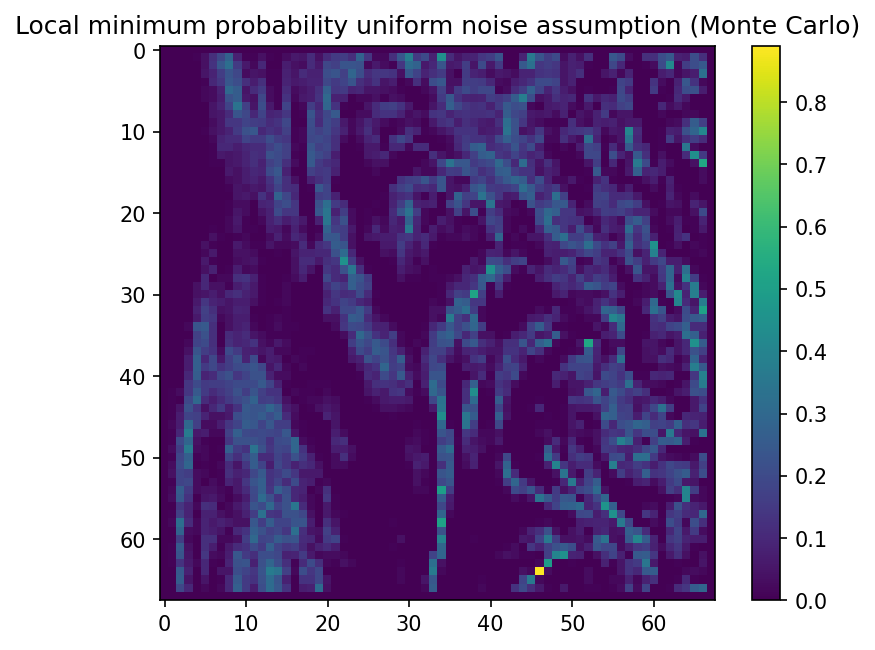

In [10]:
#Visualize local minima probabilities :  Monte Carlo, uniform noise 

numSamples = 100
start = time.time()
uniformLocalMinimumProbabilitiesMonteCarlo = MClocalMinimaProbabilityIndependentUniformWithBoundaryNotHandled(ensemble, numSamples)
end = time.time()
print('Time:',end - start)
print(uniformLocalMinimumProbabilitiesMonteCarlo.max())
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability uniform noise assumption (Monte Carlo)')
#img2 = plt.imshow(uniformLocalMinimumProbabilitiesMonteCarlo, vmin=0, vmax=0.7)
img2 = plt.imshow(uniformLocalMinimumProbabilitiesMonteCarlo)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.2], colors='#FFFFFF')
plt.gcf().set_dpi(150)

Time: 54.700185775756836


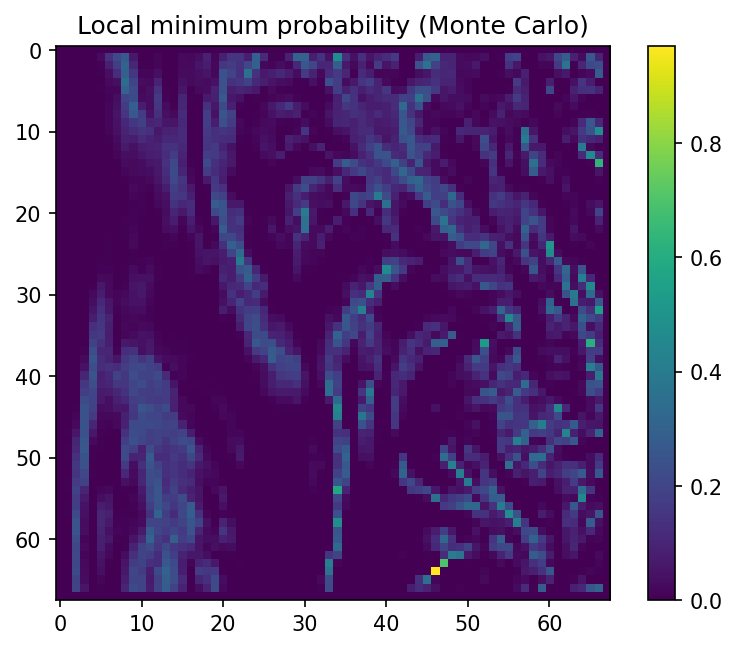

In [55]:
#Visualize local minima probabilities :  Monte Carlo

numSamples = 2000
start = time.time()
localMinimumProbabilitiesMonteCarlo = MClocalMinimaProbabilityIndependentEpanechnikovWithBoundaryNotHandled(ensemble, numSamples)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability (Monte Carlo)')
img2 = plt.imshow(localMinimumProbabilitiesMonteCarlo)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.1], colors='#FFFFFF')
plt.gcf().set_dpi(150)

Time: 5.757421016693115


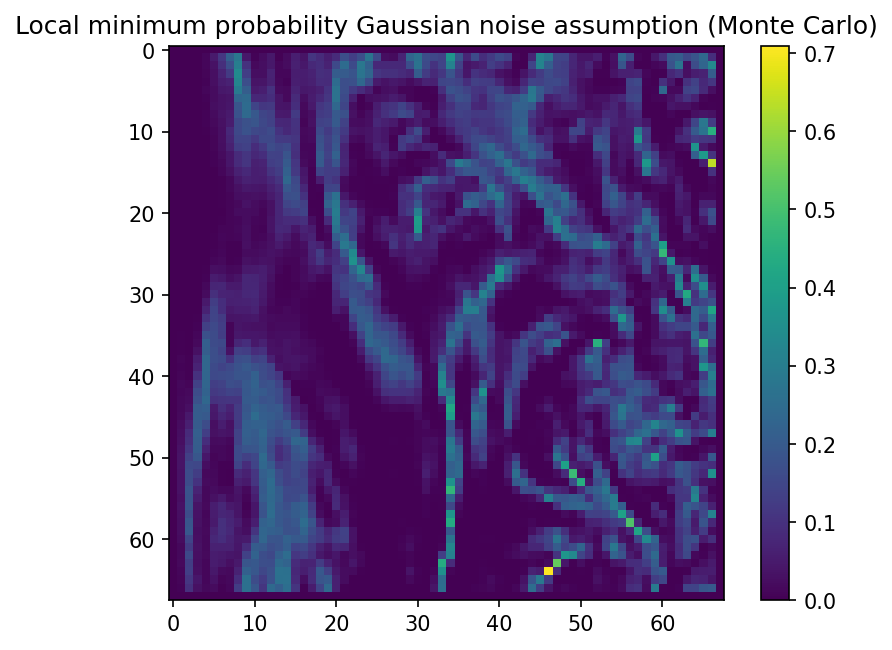

In [62]:
#Visualize local minima probabilities :  Monte Carlo, Gaussian noise

numSamples = 2000
start = time.time()
gaussianLocalMinimumProbabilitiesMonteCarlo = MClocalMinimaProbabilityIndependentGaussianWithBoundaryNotHandled(ensemble, numSamples)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability Gaussian noise assumption (Monte Carlo)')
#img2 = plt.imshow(gaussianLocalMinimumProbabilitiesMonteCarlo, vmin=0, vmax=0.7)
img2 = plt.imshow(gaussianLocalMinimumProbabilitiesMonteCarlo)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.2], colors='#FFFFFF')
plt.gcf().set_dpi(150)

In [64]:
writeResult("results/wind/independentGaussian.vtk", "minProb", gaussianLocalMinimumProbabilitiesMonteCarlo)

4624 4624


Time: 5.362942934036255


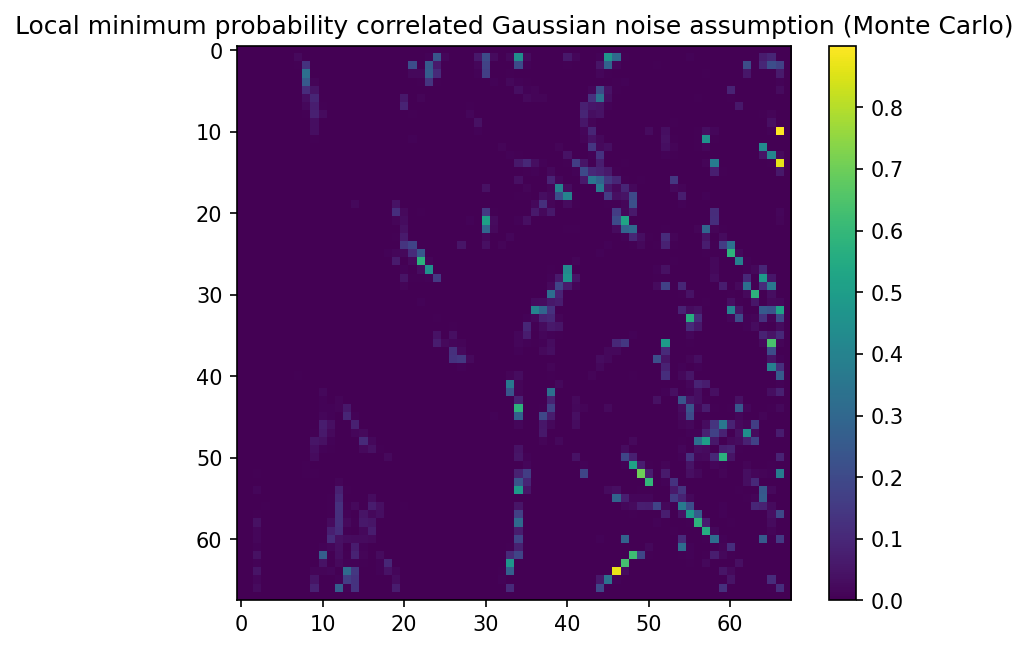

In [65]:
#Visualize local minima probabilities :  Monte Carlo, correlated Gaussian noise (Techniques by Petz and Schuermann)

numSamples = 2000
start = time.time()
correlatedGaussianLocalMinimumProbabilitiesMonteCarlo = MClocalMinimaProbabilityCorrelatedGaussianWithBoundaryNotHandled(ensemble, numSamples)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability correlated Gaussian noise assumption (Monte Carlo)')
#img2 = plt.imshow(correlatedGaussianLocalMinimumProbabilitiesMonteCarlo, vmin=0, vmax=0.7)
img2 = plt.imshow(correlatedGaussianLocalMinimumProbabilitiesMonteCarlo)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.2], colors='#FFFFFF')
plt.gcf().set_dpi(150)

In [66]:
writeResult("results/wind/correlatedGaussian.vtk", "minProb", correlatedGaussianLocalMinimumProbabilitiesMonteCarlo)

4624 4624


In [1]:
#Visualize local minima probabilities :  Monte Carlo, Histogram noise

numSamples = 50
start = time.time()
numBinsPerHistogram = 3
histogramLocalMinimumProbabilitiesMonteCarlo = MClocalMinimaProbabilityIndependentHistogramWithBoundaryNotHandled(ensemble, numSamples, numBinsPerHistogram)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability histogram noise assumption (Monte Carlo)')
img2 = plt.imshow(histogramLocalMinimumProbabilitiesMonteCarlo, vmin=0, vmax=0.7)
max(histogramLocalMinimumProbabilitiesMonteCarlo)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.2], colors='#FFFFFF')
plt.gcf().set_dpi(150)

NameError: name 'time' is not defined

Time: 57.08421206474304


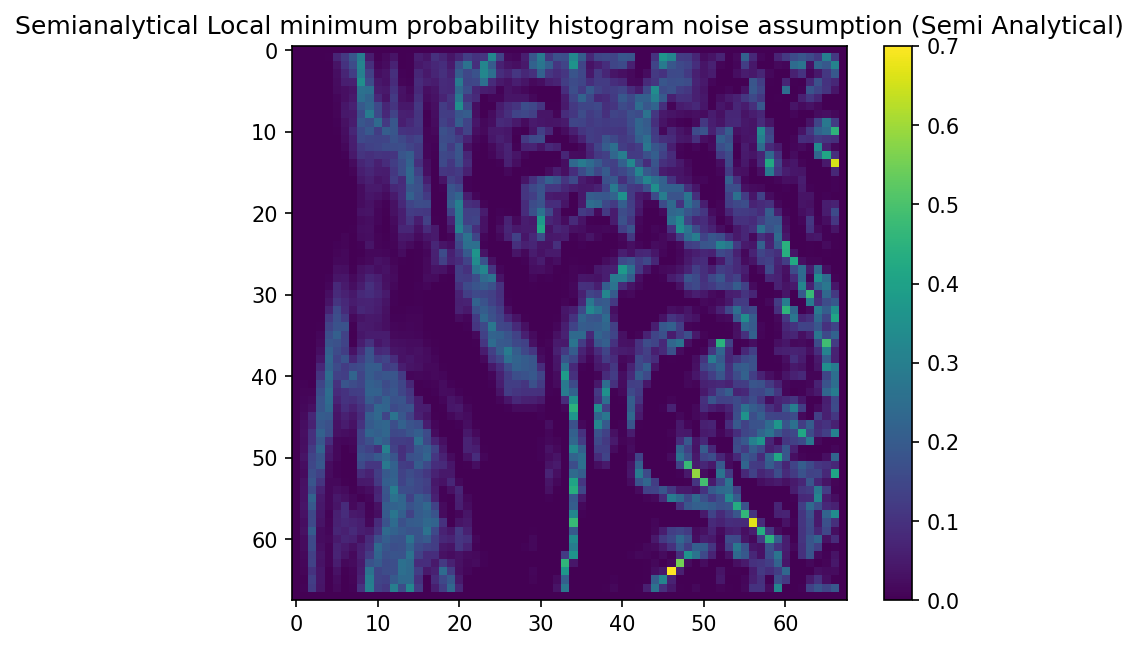

In [49]:
#Visualize local minima probabilities :  Monte Carlo, Histogram noise

numSamples = 2000
start = time.time()
numBinsPerHistogram = 3
histogramLocalMinimumProbabilitiesMonteCarlo = semiAnalyticalMClocalMinimaProbabilityIndependentHistogramWithBoundaryNotHandled(ensemble, numSamples, numBinsPerHistogram)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Semianalytical Local minimum probability histogram noise assumption (Semi Analytical)')
#img2 = plt.imshow(histogramLocalMinimumProbabilitiesMonteCarlo, vmin=0, vmax=0.7)
img2 = plt.imshow(histogramLocalMinimumProbabilitiesMonteCarlo, vmin=0, vmax=0.7)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.2], colors='#FFFFFF')
plt.gcf().set_dpi(150)

Time: 0.15264010429382324


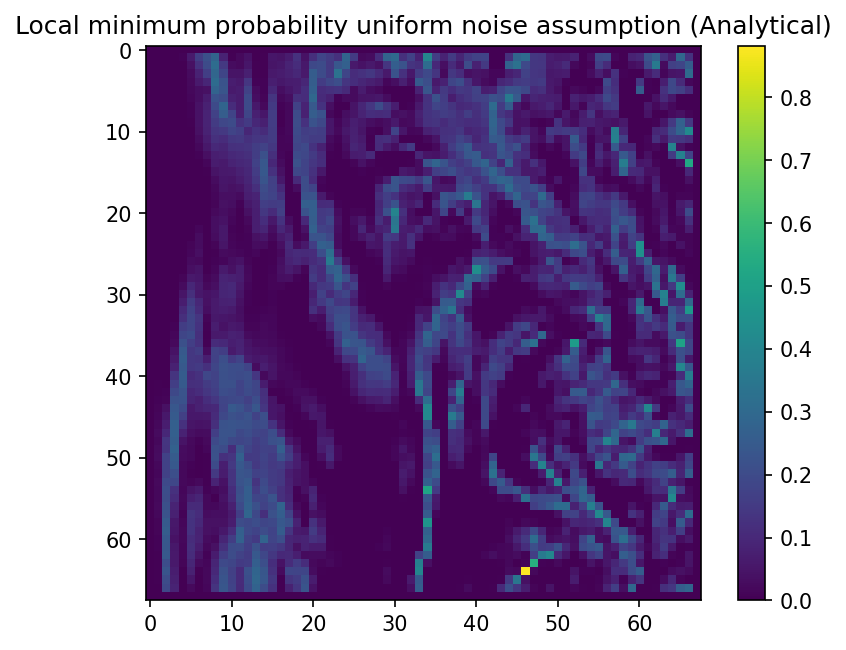

In [67]:
#Visualize local minima probabilities :  Analytical, Uniform

start = time.time()
uniformLocalMinimumProbabilitiesAnalytical = anlyticalLocalMinimaProbabilityIndependentUniformWithBoundaryNotHandled(ensemble)
end = time.time()
print('Time:', end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability uniform noise assumption (Analytical)')
#img2 = plt.imshow(uniformLocalMinimumProbabilitiesAnalytical, vmin=0, vmax=0.7)
img2 = plt.imshow(uniformLocalMinimumProbabilitiesAnalytical)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesAnalytical, levels=[0.1], colors='#FFFFFF')
plt.gcf().set_dpi(150)


##Visualize difference between analytical and Monte Carlo
#diffImg = np.abs(localMinimumProbabilitiesMonteCarlo - localMinimumProbabilitiesAnalytical)
#print(np.amax(diffImg))
##localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
#plt.figure()
#plt.title('Difference between analytical and Monte Carlo')
#img2 = plt.imshow(diffImg, vmin=0, vmax=1)
##plt.gca().invert_yaxis()
#plt.colorbar(img2)
##plt.contour(localMaximumProbabilitiesMonteCarlo, levels=[0.1], colors='#FFFFFF')
#plt.gcf().set_dpi(150)


#h, w = localMinimumProbabilitiesAnalytical.shape
#for i in range(h):
#    for j in range(w):
#        if diffImg[i,j]>0.15:
#            print('i',i)
#            print('j',j)

In [68]:
writeResult("results/wind/independentUniform.vtk", "minProb", uniformLocalMinimumProbabilitiesAnalytical)

4624 4624


Time: 0.4799339771270752


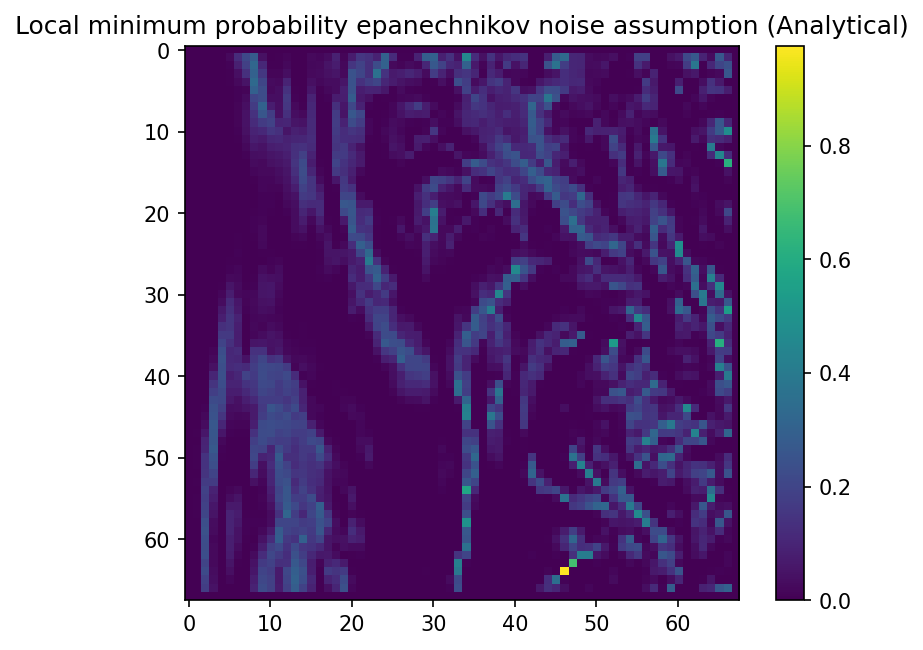

In [72]:
#Visualize local minima probabilities :  Analytical, Epanechnikov with min and max of range

start = time.time()
epanechnikovLocalMinimumProbabilitiesAnalytical = anlyticalLocalMinimaProbabilityIndependentEpanechnikovWithBoundaryNotHandled(ensemble)
end = time.time()
print('Time:', end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability epanechnikov noise assumption (Analytical)')
#img2 = plt.imshow(epanechnikovLocalMinimumProbabilitiesAnalytical, vmin=0, vmax=0.7)
img2 = plt.imshow(epanechnikovLocalMinimumProbabilitiesAnalytical)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesAnalytical, levels=[0.1], colors='#FFFFFF')
plt.gcf().set_dpi(150)


In [73]:
writeResult("results/wind/independentEpanechnikov.vtk", "minProb", epanechnikovLocalMinimumProbabilitiesAnalytical)

4624 4624


Time: 6.589150905609131
0.024042701472920036


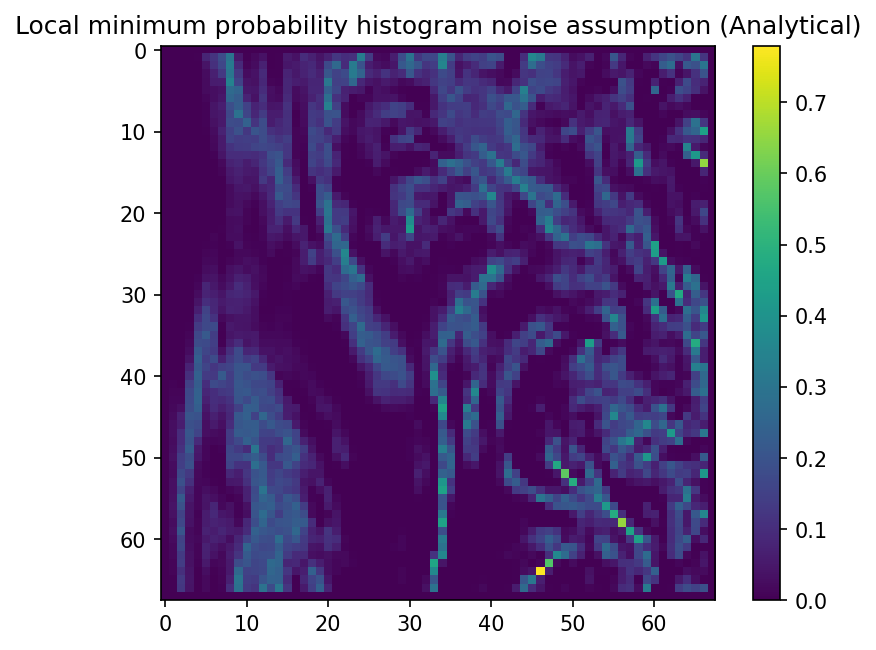

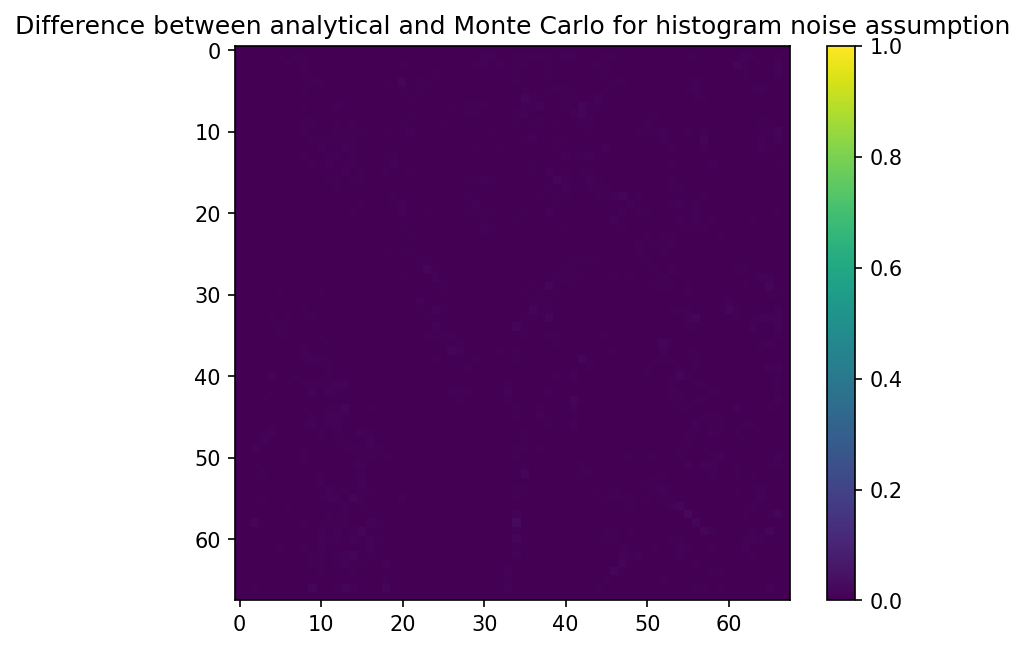

In [74]:
#Visualize local minima probabilities :  Closed form

start = time.time()
numBinsPerHistogram = 3
histogramLocalMinimumProbabilitiesAnalytical = analyticalLocalMinimaProbabilityIndependentHistogramWithBoundaryNotHandled(ensemble, numBinsPerHistogram)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability histogram noise assumption (Analytical)')
#img2 = plt.imshow(histogramLocalMinimumProbabilitiesAnalytical, vmin=0, vmax=0.7)
img2 = plt.imshow(histogramLocalMinimumProbabilitiesAnalytical)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.2], colors='#FFFFFF')
plt.gcf().set_dpi(150)


#Visualize difference between analytical and Monte Carlo
diffImg = np.abs(histogramLocalMinimumProbabilitiesMonteCarlo - histogramLocalMinimumProbabilitiesAnalytical)
print(np.amax(diffImg))
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Difference between analytical and Monte Carlo for histogram noise assumption')
img2 = plt.imshow(diffImg, vmin=0, vmax=1)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMaximumProbabilitiesMonteCarlo, levels=[0.1], colors='#FFFFFF')
plt.gcf().set_dpi(150)


#h, w = localMinimumProbabilitiesAnalytical.shape
#for i in range(h):
#    for j in range(w):
#        if diffImg[i,j]>0.15:
#            print('i',i)
#            print('j',j)

In [75]:
writeResult("results/wind/independentHistogram3Bins.vtk", "minProb", histogramLocalMinimumProbabilitiesAnalytical)

4624 4624
